# <center>Predictive Modeling for Tyroid Cancer Recurrence </center>


###     **BUSINESS PROBLEM STATEMENT:**

#### Develop a predictive model that classify whether a patient has hypothyroidism based on their blood results & demographic information

## Importing necessary libraries

In [303]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#sns.set()

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [149]:
df = pd.read_csv('Thyroid_Diff.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [150]:
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 383 rows and 17 columns


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [7]:
## Checking for duplicates

print(f"Count of Duplicates: {df.duplicated().sum()}")

Count of Duplicates: 19


In [8]:
duplicated_rows = df[df.duplicated()]

print("Duplicated Rows:")
print(duplicated_rows)

Duplicated Rows:
     Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
32    36      F      No         No              No        Euthyroid   
38    40      F      No         No              No        Euthyroid   
40    51      F      No         No              No        Euthyroid   
66    35      F      No         No              No        Euthyroid   
69    51      F      No         No              No        Euthyroid   
77    29      F      No         No              No        Euthyroid   
120   37      F      No         No              No        Euthyroid   
121   26      F      No         No              No        Euthyroid   
123   28      F      No         No              No        Euthyroid   
132   32      F      No         No              No        Euthyroid   
137   32      F      No         No              No        Euthyroid   
138   26      F      No         No              No        Euthyroid   
166   31      F      No         No              No        Eu

In [9]:
df1 = df.copy()

In [10]:
df1.drop_duplicates(inplace = True)

In [11]:
df1.shape

(364, 17)

In [12]:
df1.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [13]:
obj_col = df1.select_dtypes(include = ['object']).columns
print("No of categorical columns:", len(obj_col))
print(list(obj_col))

No of categorical columns: 16
['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']


In [305]:
# ## list of unique values

# for i in obj_col:
#     print('-'*50)
#     print()
#     print(i, ':', df1[i].unique())
#     print()
    

                     Total no. of Unique Values
Gender                   2
Smoking                  2
Hx Smoking               2
Hx Radiothreapy          2
Focality                 2
M                        2
Risk                     3
N                        3
Pathology                4
Response                 4
Thyroid Function         5
Physical Examination     5
Stage                    5
Adenopathy               6
T                        7
Age                     65
dtype: int64


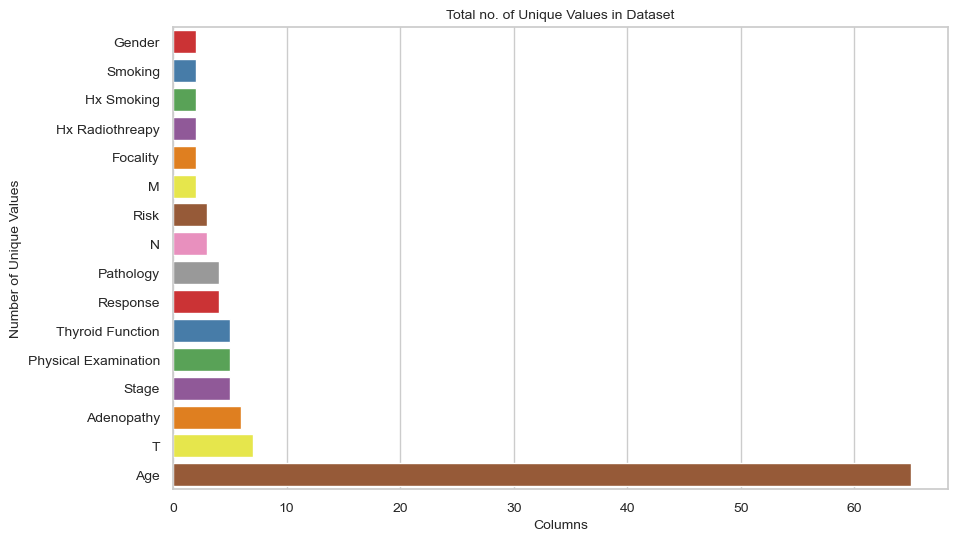

In [15]:
def check_unquie_count(df1):
    unique_counts = df1.nunique().sort_values()
    print('=='*30)
    print('  '*10, 'Total no. of Unique Values')
    print('=='*30)
    print(unique_counts)
    print('=='*30)

    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.barplot(y=unique_counts.index, x=unique_counts.sort_values(),palette='Set1' )

    plt.xticks(rotation=0, fontsize= 10)
    plt.yticks( fontsize= 10 )
    plt.xlabel('Columns',fontsize=10)
    plt.ylabel('Number of Unique Values', fontsize=10)
    plt.title('Total no. of Unique Values in Dataset', fontsize=10)


    plt.show()

check_unquie_count(df1.iloc[:,0:-1])

## Statistical Summary

In [16]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,364.0,41.25,15.31436,15.0,30.0,38.0,52.0,82.0


In [17]:
## mode values of cat columns
df1.describe(include = 'object').T

,count,unique,top,freq
Gender,364,2,F,293
Smoking,364,2,No,315
Hx Smoking,364,2,No,336
Hx Radiothreapy,364,2,No,357
Thyroid Function,364,5,Euthyroid,313
Physical Examination,364,5,Multinodular goiter,135
Adenopathy,364,6,No,258
Pathology,364,4,Papillary,271
Focality,364,2,Uni-Focal,228
Risk,364,3,Low,230


### Univariate Analysis

In [18]:
Recurred_cases = len(df1[df1['Recurred'] == 'Yes']) /len(df1) * 100
print(f"Recurred cases: {round(Recurred_cases,2)} %")

Not_Recurred_cases = len(df1[df1['Recurred'] == 'No']) /len(df1) * 100
print(f"Not Recurred cases: {round(Not_Recurred_cases,2)} %")

Recurred cases: 29.67 %
Not Recurred cases: 70.33 %


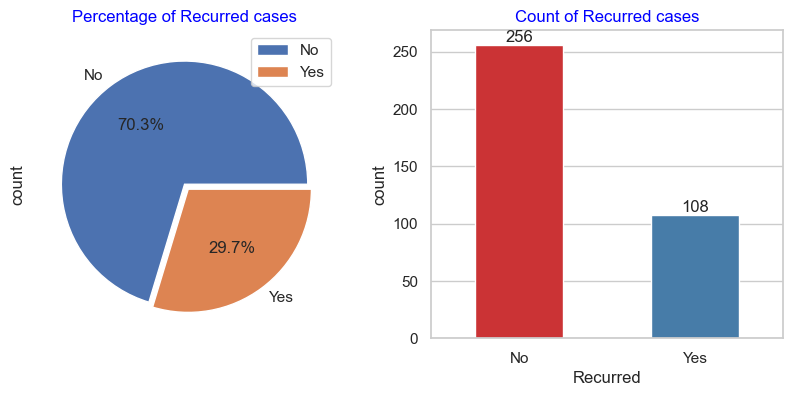

In [19]:
recurred = df1['Recurred'].value_counts()
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
recurred.plot(kind='pie', explode=(0,0.05), autopct = '%1.1f%%')
plt.title('Recurred Percentage', color ='blue')
plt.legend(['No','Yes'])
plt.title("Percentage of Recurred cases")

plt.subplot(1,2,2)
ax = sns.countplot(x = 'Recurred', data = df1, palette = 'Set1', width = 0.5)

for i in ax.containers:
    ax.bar_label(i)
plt.title("Count of Recurred cases", color ='blue')

plt.show()


In [20]:
obj_col

Index(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [21]:
df1.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [22]:
df1['Gender'].value_counts()

Gender
F    293
M     71
Name: count, dtype: int64

In [23]:
# plt.figure(figsize = (16,16))
# plt.subplots_adjust(hspace = 0.50, wspace = 0.50)

# for i in range(len(obj_col)):
#     plt.subplot(3,3,i+1)
#     plt.xticks(rotation=90)
#     sns.countplot(df[obj_col[i]], palette = 'Set1')
    
# plt.show()

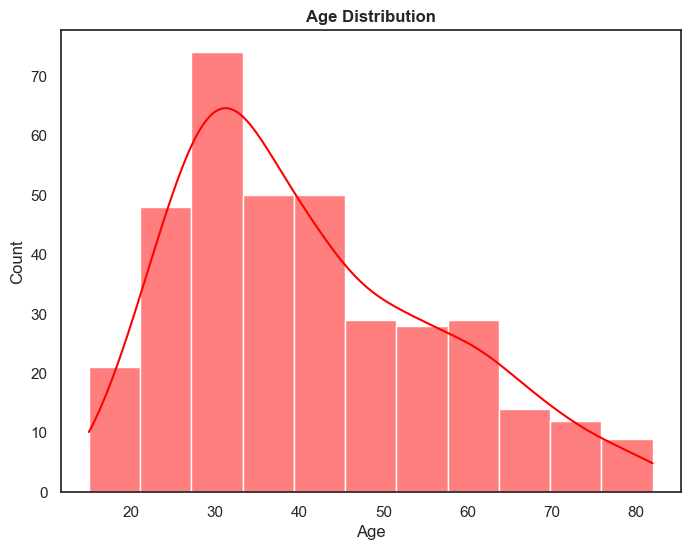

In [24]:
## Age
plt.figure(figsize= (8,6))
sns.set(style='white', palette='Set1')
sns.histplot(data = df1, x = 'Age', kde = True, color = 'red')
plt.title("Age Distribution", fontweight='bold')
# plt.show()
plt.grid(False) 

##### It seems that many people aged around 30-40 are undergoing treatment.

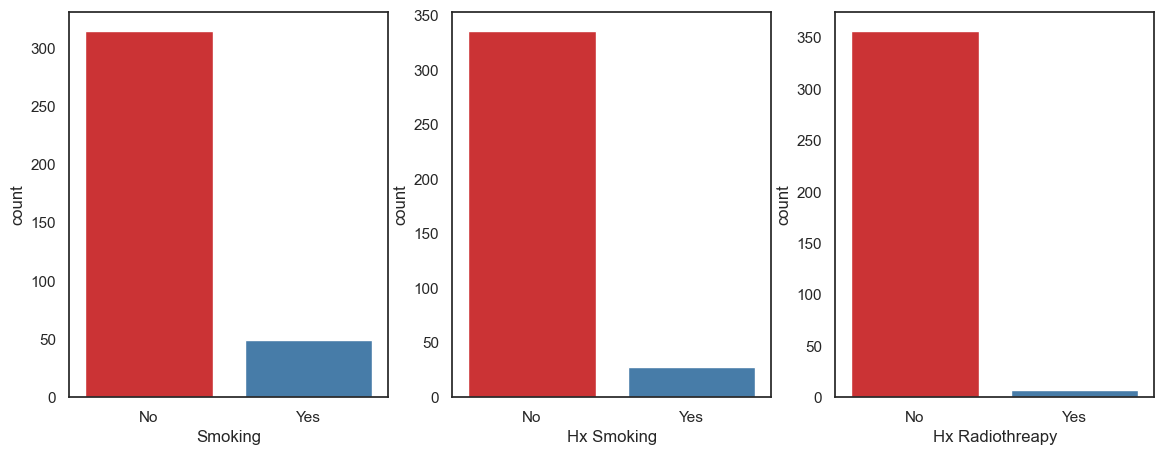

In [25]:
plt.figure(figsize =(14,5))
sns.set(style='white', palette='Set1')
## Smoking
plt.subplot(1,3,1)
sns.countplot(x = 'Smoking', data = df1, palette = 'Set1')
plt.grid(False) 

## Hx Smoking
plt.subplot(1,3,2)
sns.countplot(x = 'Hx Smoking', data = df1, palette = 'Set1')
plt.grid(False) 

## Hx Radiothreapy
plt.subplot(1,3,3)
sns.countplot(x = 'Hx Radiothreapy', data = df1, palette = 'Set1')
plt.grid(False) 
plt.show()

##### It seems that most of the patients undergoing treatment are non-smokers with no smoking history and have not undergone radiotherapy. Only a few have smoking habits and have undergone radiotherapy

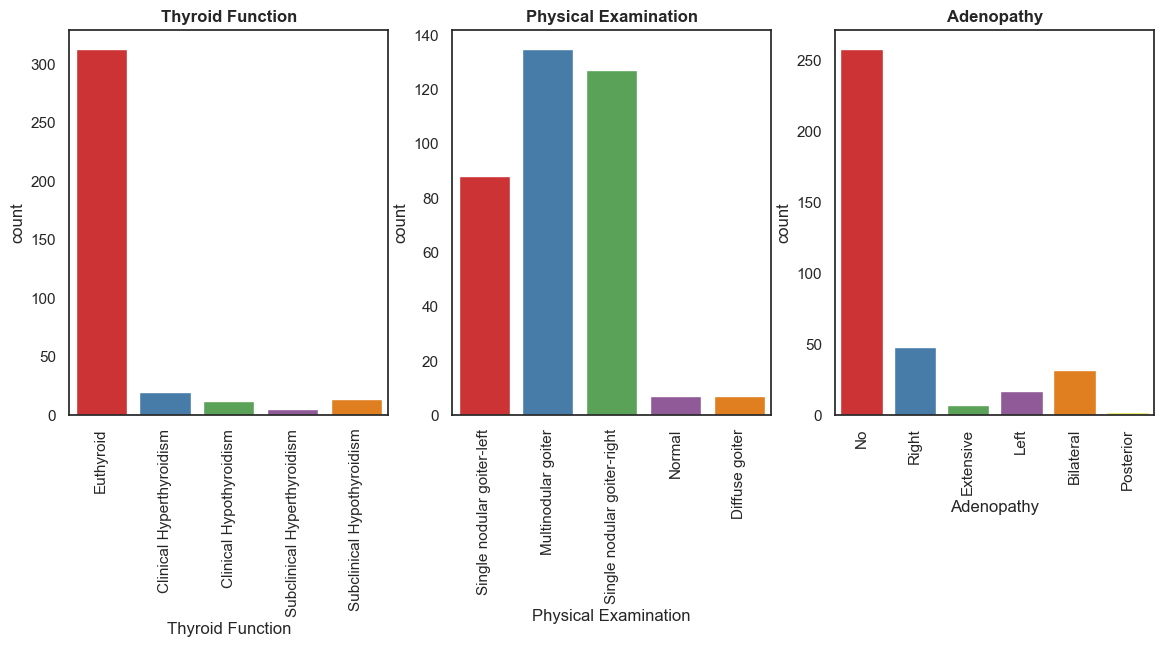

In [26]:
plt.figure(figsize =(14,5))
sns.set(style='white', palette='Set1')
## Thyroid Function
plt.subplot(1,3,1)
sns.countplot(x = 'Thyroid Function', data = df1, palette = 'Set1')
plt.grid(False) 
plt.xticks(rotation=90)
plt.title("Thyroid Function", fontweight='bold')

## Physical Examination
plt.subplot(1,3,2)
sns.countplot(x = 'Physical Examination', data = df1, palette = 'Set1')
plt.grid(False) 
plt.xticks(rotation=90)
plt.title("Physical Examination", fontweight='bold')

## Adenopathy
plt.subplot(1,3,3)
sns.countplot(x = 'Adenopathy', data = df1, palette = 'Set1')
plt.grid(False)
plt.xticks(rotation=90)
plt.title("Adenopathy", fontweight='bold')

plt.show()

##### Status of tyroid function for most of the patients is Euthyroid. 
##### Physical examination - Multinodular goiter followed by single nodular goiter-right/left.
##### Adenopathy - There is no presence of enlarged lymph nodes in the neck region in most of the patients 

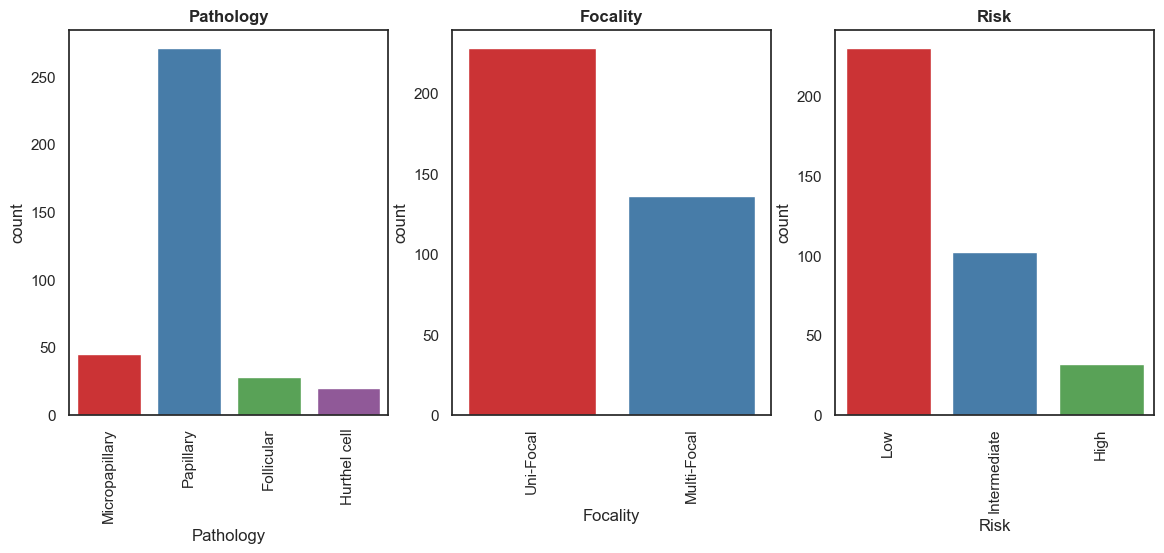

In [27]:
plt.figure(figsize =(14,5))
sns.set(style='white', palette='Set1')
## Pathology
plt.subplot(1,3,1)
sns.countplot(x = 'Pathology', data = df1, palette = 'Set1')
plt.grid(False) 
plt.xticks(rotation=90)
plt.title("Pathology", fontweight='bold')

## Focality
plt.subplot(1,3,2)
sns.countplot(x = 'Focality', data = df1, palette = 'Set1')
plt.grid(False) 
plt.xticks(rotation=90)
plt.title("Focality", fontweight='bold')

## Risk
plt.subplot(1,3,3)
sns.countplot(x = 'Risk', data = df1, palette = 'Set1')
plt.grid(False)
plt.xticks(rotation=90)
plt.title("Risk", fontweight='bold')

plt.show()

##### Papillary thyroid cancer is the most commonly observed specific type of cancer in all the patients
##### The common type of cancer observed in the patients is unifocal

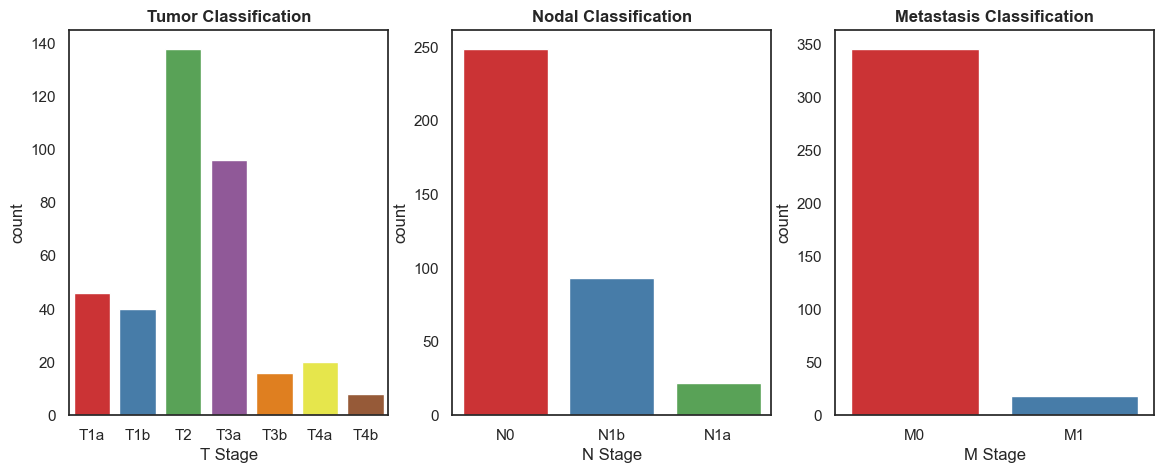

In [28]:
plt.figure(figsize =(14,5))
sns.set(style='white', palette='Set1')
## T
plt.subplot(1,3,1)
sns.countplot(x = 'T', data = df1, palette = 'Set1')
plt.grid(False) 
plt.title("Tumor Classification", fontweight='bold')
plt.xlabel("T Stage")

## N
plt.subplot(1,3,2)
sns.countplot(x = 'N', data = df1, palette = 'Set1')
plt.grid(False) 
plt.title("Nodal Classification", fontweight='bold')
plt.xlabel("N Stage")

## M
plt.subplot(1,3,3)
sns.countplot(x = 'M', data = df1, palette = 'Set1')
plt.grid(False)
plt.title("Metastasis Classification", fontweight='bold')
plt.xlabel("M Stage")

plt.show()

##### Tumor classification - T2 followed by T3a
##### Nodal classification - N0 followed by N1b
##### Metasis Classification - M0

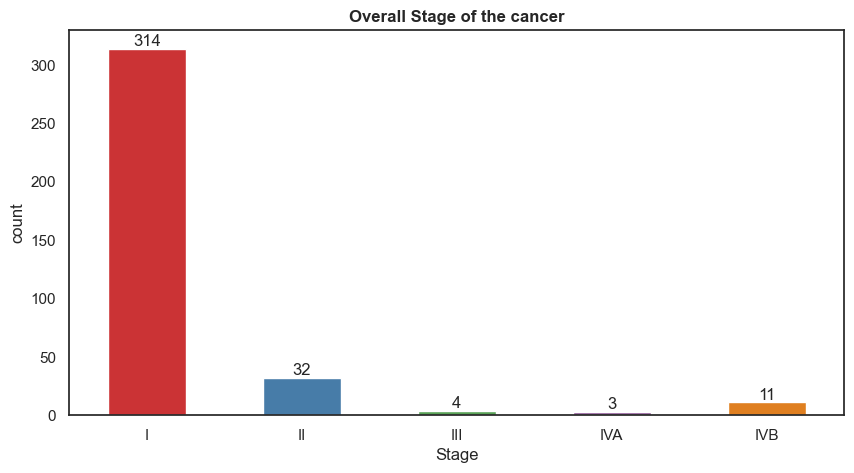

In [29]:
stage_order = ['I', 'II', 'III', 'IVA', 'IVB']

plt.figure(figsize =(10,5))
ax = sns.countplot(x = 'Stage', data = df1, palette = 'Set1', order = stage_order, width = 0.5)
plt.title("Overall Stage of the cancer", fontweight='bold')

for i in ax.containers:
    ax.bar_label(i)
plt.show()  

##### We can see, most of the patients are in the first stage of cancer 

## Bivariate Analysis

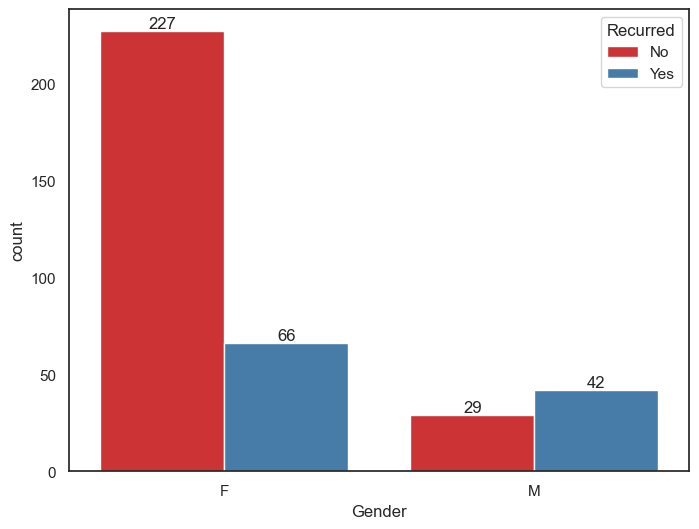

In [31]:
## Age
plt.figure(figsize = (8,6))
ax = sns.countplot(x = 'Gender', hue = 'Recurred', data = df1, palette = 'Set1')
for i in ax.containers:
    ax.bar_label(i)

plt.show()

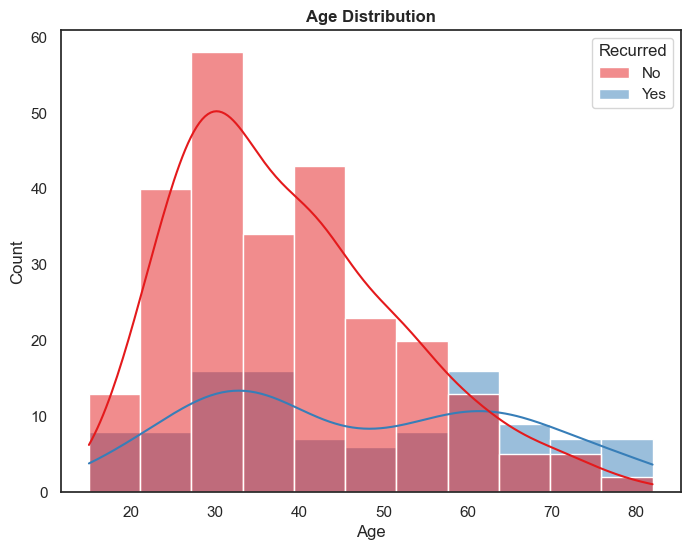

In [32]:
## Age
plt.figure(figsize= (8,6))
#sns.set(style='white', palette='Set1')
sns.histplot(data = df1, x = 'Age', kde = True,  hue = 'Recurred')
plt.title("Age Distribution", fontweight='bold')
# plt.show()
plt.grid(False)

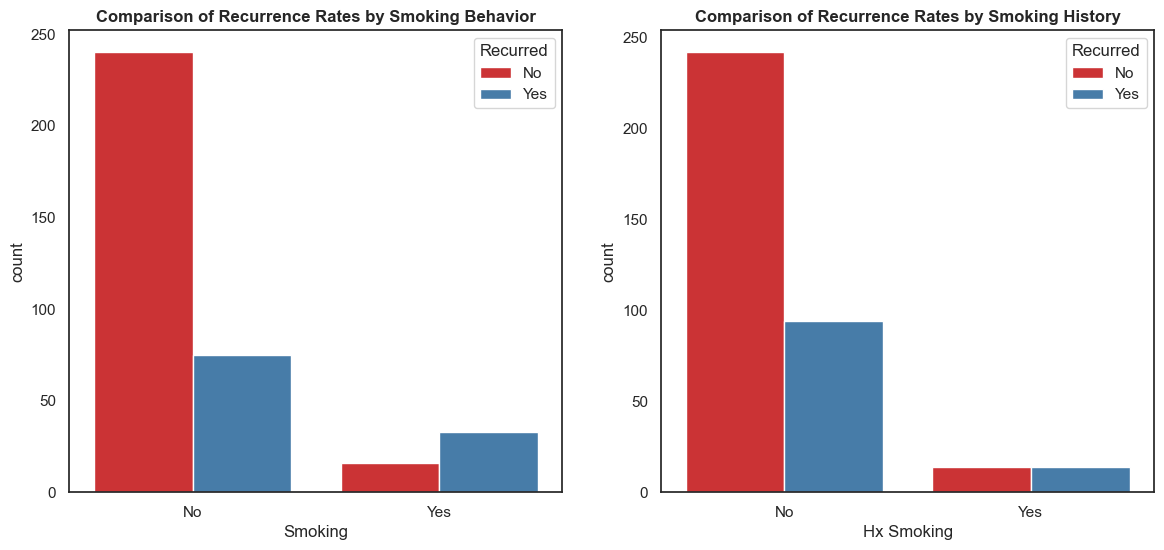

In [33]:
## Smoking
plt.figure(figsize= (14,6))

plt.subplot(1,2,1)
sns.countplot(data = df1, x = 'Smoking', hue = 'Recurred')
plt.title("Comparison of Recurrence Rates by Smoking Behavior", fontweight='bold')
# plt.show()
plt.grid(False)

##Hx Smoking
plt.subplot(1,2,2)
#sns.set(style='white', palette='Set1')
sns.countplot(data = df1, x = 'Hx Smoking',  hue = 'Recurred')
plt.title("Comparison of Recurrence Rates by Smoking History", fontweight='bold')
# plt.show()
plt.grid(False)


##### The recurrence of the disease is higher among patients with smoking habits, and a few non-smokers have also experienced hypothyroidism again

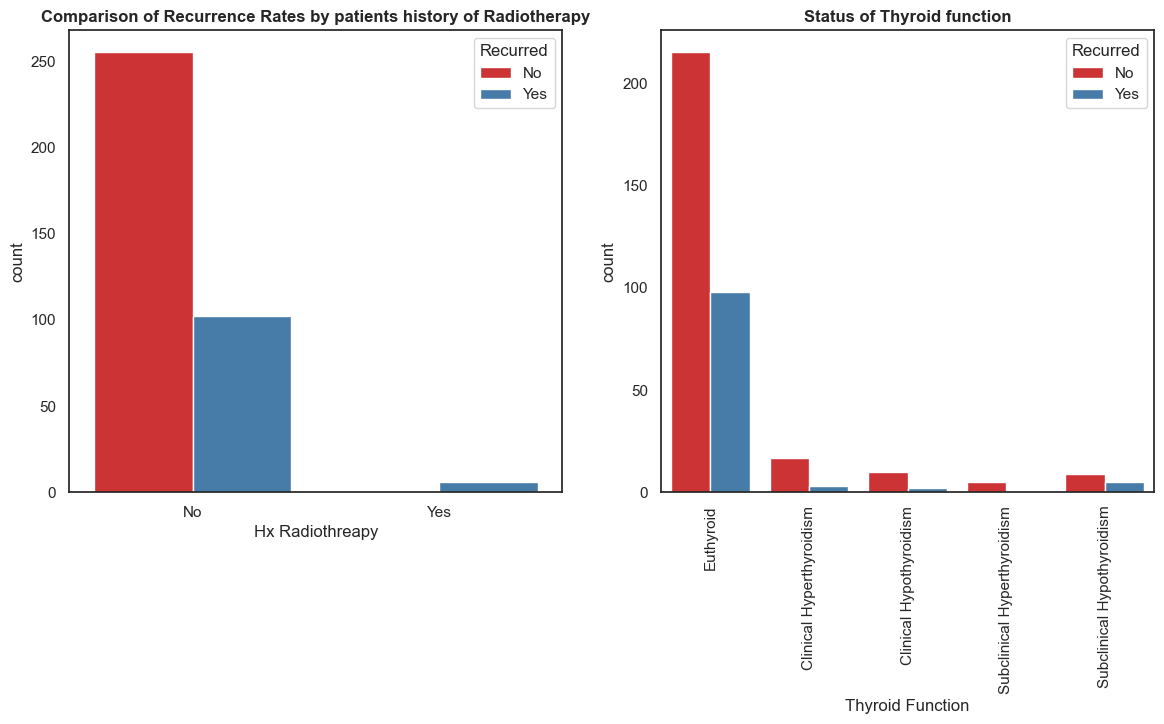

In [34]:
## Hx Radiothreapy
plt.figure(figsize= (14,6))

plt.subplot(1,2,1)
sns.countplot(data = df1, x = 'Hx Radiothreapy', hue = 'Recurred')
plt.title("Comparison of Recurrence Rates by patients history of Radiotherapy", fontweight='bold')
# plt.show()
plt.grid(False)

##Hx Smoking
plt.subplot(1,2,2)
#sns.set(style='white', palette='Set1')
sns.countplot(data = df1, x = 'Thyroid Function',  hue = 'Recurred')
plt.title("Status of Thyroid function", fontweight='bold')
plt.xticks(rotation = 90)
# plt.show()
plt.grid(False)

##### Patients who did not have any history of radiotherapy treatment experienced recurrence.
##### Most of the Patients having Euthyroid function experinced recurrence compared to other types

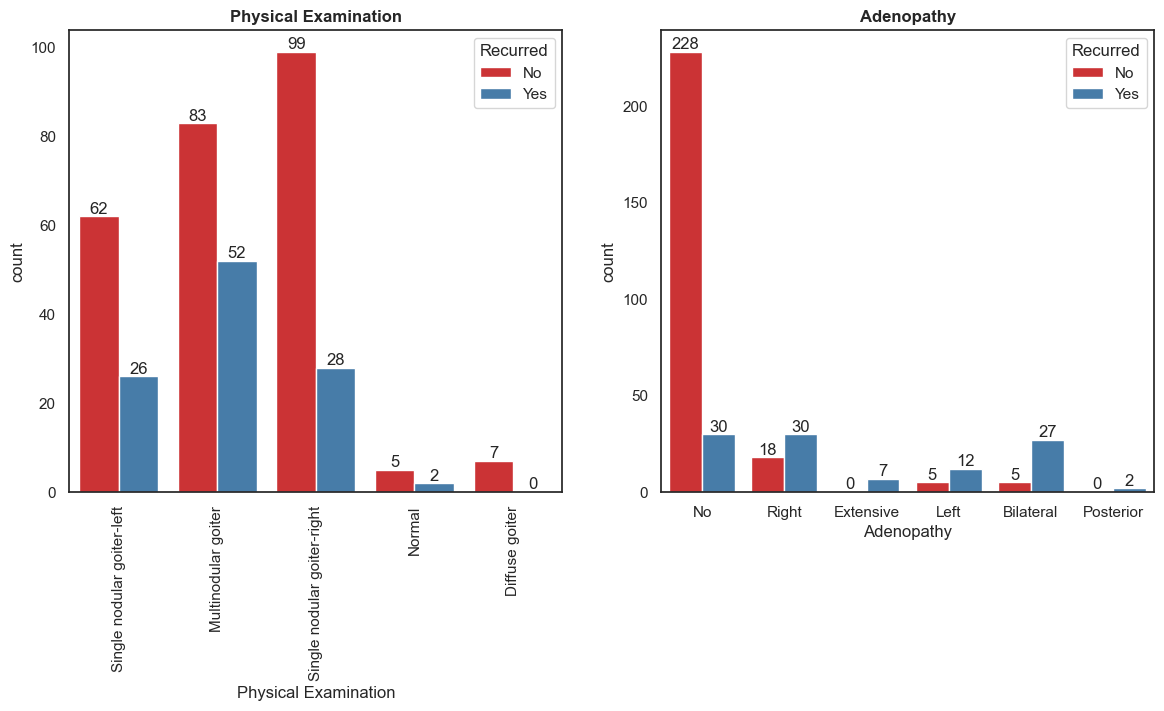

In [35]:
## Physical Examination
plt.figure(figsize= (14,6))

plt.subplot(1,2,1)
ax=sns.countplot(data = df1, x = 'Physical Examination', hue = 'Recurred')
for i in ax.containers:
    ax.bar_label(i)
plt.title("Physical Examination", fontweight='bold')
plt.xticks(rotation = 90)
# plt.show()
plt.grid(False)

##Hx Smoking
plt.subplot(1,2,2)
#sns.set(style='white', palette='Set1')
ax=sns.countplot(data = df1, x = 'Adenopathy',  hue = 'Recurred')
for i in ax.containers:
    ax.bar_label(i)
plt.title("Adenopathy", fontweight='bold')

# plt.show()
plt.grid(False)

##### Chances of Recurrence is high in Multinodular goiter followed by Single nodular goiter left/right 
##### Most of the people who have enlarged lymph nodes around the neck region experienced recurrence, and a few who do not have enlarged lymph nodes also experienced recurrence

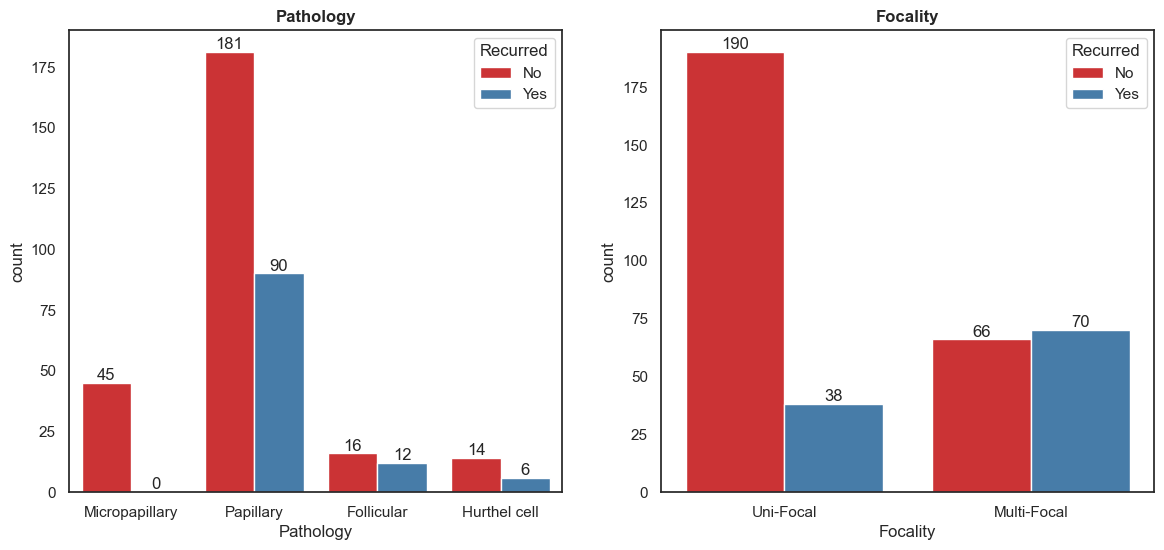

In [36]:
## Pathology
plt.figure(figsize= (14,6))

plt.subplot(1,2,1)
ax=sns.countplot(data = df1, x = 'Pathology', hue = 'Recurred')
for i in ax.containers:
    ax.bar_label(i)
plt.title("Pathology", fontweight='bold')
#plt.xticks(rotation = 90)
# plt.show()
plt.grid(False)

##Hx Smoking
plt.subplot(1,2,2)
#sns.set(style='white', palette='Set1')
ax = sns.countplot(data = df1, x = 'Focality',  hue = 'Recurred')
for i in ax.containers:
    ax.bar_label(i)
plt.title("Focality", fontweight='bold')

# plt.show()
plt.grid(False)

##### The types of cancer where recurrence is most common are papillary, followed by follicular and Hürthle cell carcinoma
##### Patients with multifocal cancer have a higher likelihood of recurrence

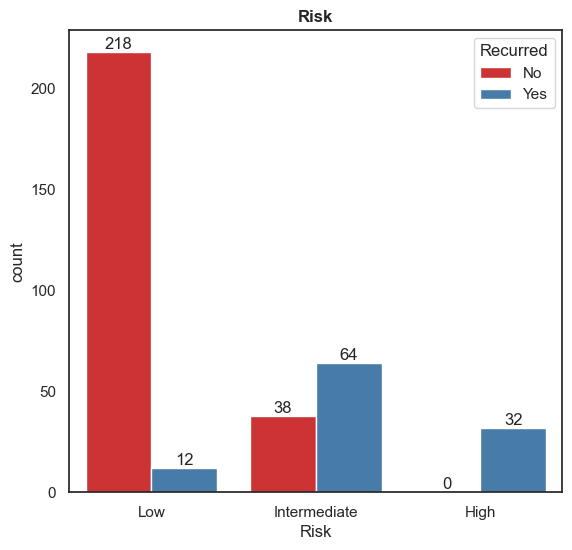

In [37]:
## Risk

plt.figure(figsize= (14,6))

plt.subplot(1,2,1)
ax = sns.countplot(data = df1, x = 'Risk', hue = 'Recurred')

for i in ax.containers:
    ax.bar_label(i)
plt.title("Risk", fontweight='bold')
#plt.xticks(rotation = 90)
# plt.show()
plt.grid(False)

##### Patients with higher and intermediate risk have a higher likelihood of recurrence, whereas patients with low risk have a lower chance of recurrence

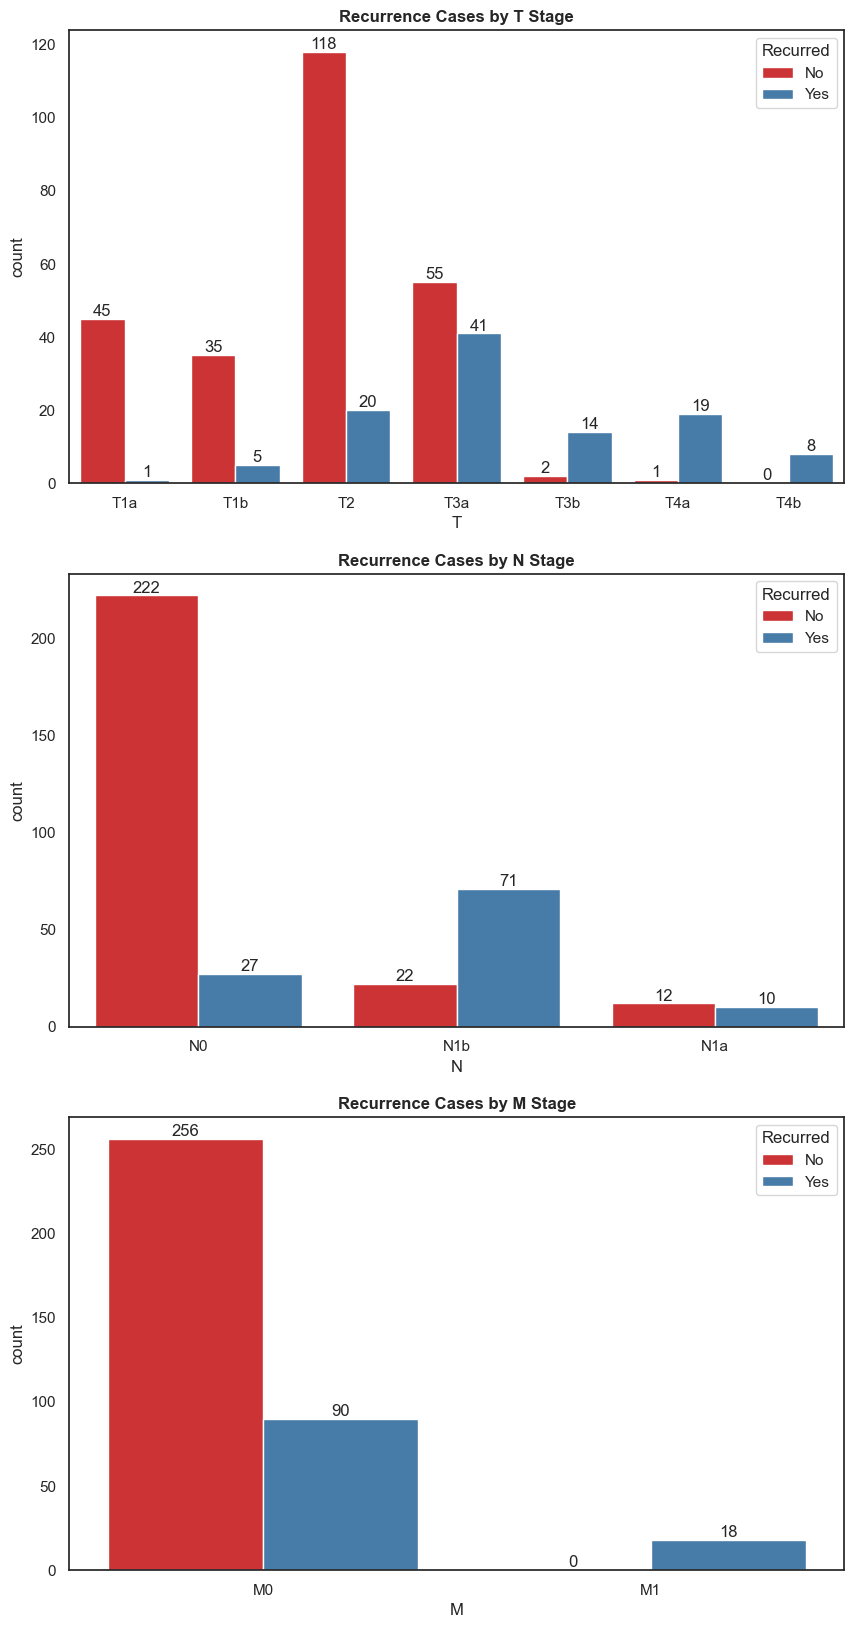

In [38]:
## T Stage
plt.figure(figsize= (10,20))

plt.subplot(3,1,1)
ax=sns.countplot(data = df1, x = 'T', hue = 'Recurred')
for i in ax.containers:
    ax.bar_label(i)
plt.title("Recurrence Cases by T Stage", fontweight='bold')


## N Stage
plt.subplot(3,1,2)
#sns.set(style='white', palette='Set1')
ax = sns.countplot(data = df1, x = 'N',  hue = 'Recurred')
for i in ax.containers:
    ax.bar_label(i)
plt.title("Recurrence Cases by N Stage", fontweight='bold')



## M Stage
plt.subplot(3,1,3)
#sns.set(style='white', palette='Set1')
ax = sns.countplot(data = df1, x = 'M',  hue = 'Recurred')
for i in ax.containers:
    ax.bar_label(i)
plt.title("Recurrence Cases by M Stage", fontweight='bold')

plt.show()

##### T Stage - Patients in T3a, T3b, T4a, T4b stages have a high chance of disease recurrence, whereas very few in T1a, T1b, T2 stages do.
##### N Stage - Patients in N1b stage have a high chance of disease recurrence, followed by those in N1a stage.
##### M Stage - Patients in M1 stage are experiencing recurrence, while very few in M0 stage are.

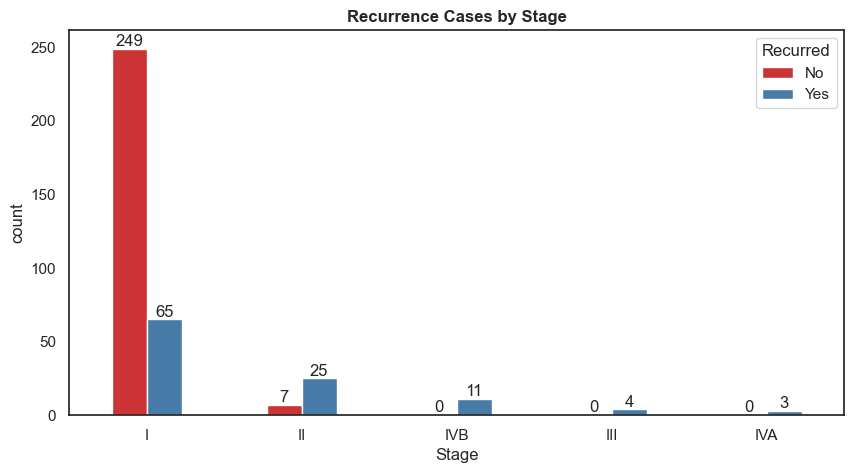

In [39]:
## Stage
plt.figure(figsize=(10,5))
ax = sns.countplot(data = df1, x = 'Stage',  hue = 'Recurred', width = 0.45)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Recurrence Cases by Stage", fontweight='bold')

plt.show()

##### Many patients are in Stage 1, and almost 30% of them have experienced recurrence of the disease. Higher chances of recurrence can be seen in patients who are in Stages 2, 3, and 4a.

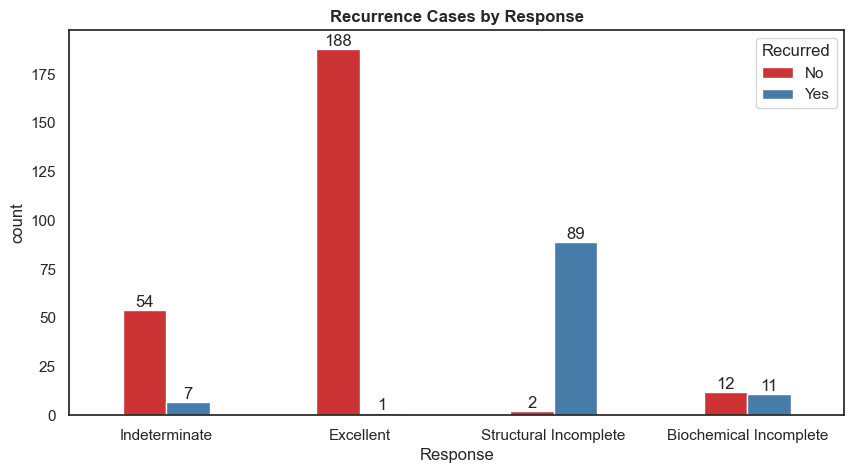

In [40]:
## Response
plt.figure(figsize=(10,5))
ax = sns.countplot(data = df1, x = 'Response',  hue = 'Recurred', width = 0.45)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Recurrence Cases by Response", fontweight='bold')

plt.show()

##### Recurrence is observed to be high in patients where cancer responded with Structural Incomplete and Biochemical Incomplete outcomes, and least in cases classified as Indeterminate

## Converting Categorical Columns

### Gender

In [62]:
Gender_dict = {'F' :0, 'M' : 1}
df1['Gender'] = df1['Gender'].map(Gender_dict).astype(int)


### Smoking

In [42]:
#df1['Smoking'].value_counts()
Smoking_dict = {'No' :0, 'Yes' : 1}
df1['Smoking'] = df1['Smoking'].map(Smoking_dict).astype(int)

### Hx Smoking

In [43]:
#df1['Hx Smoking'].value_counts()
HxSmoking_dict = {'No' :0, 'Yes' : 1}
df1['Hx Smoking'] = df1['Hx Smoking'].map(HxSmoking_dict).astype(int)

### Hx Radiothreapy

In [44]:
# df1['Hx Radiothreapy'].value_counts()
HxRadiothreapy_dict = {'No' :0, 'Yes' : 1}
df1['Hx Radiothreapy'] = df1['Hx Radiothreapy'].map(HxRadiothreapy_dict).astype(int)

### Risk

In [45]:
#df1['Risk'].value_counts()
Risk_dict = {'Low' :0, 'Intermediate' : 1, 'High': 2}
df1['Risk'] = df1['Risk'].map(Risk_dict).astype(int)

### Recurred (Target Variable)

In [46]:
df1['Recurred'].value_counts()
Recurred_dict = {'No' :0, 'Yes' : 1}
df1['Recurred'] = df1['Recurred'].map(Recurred_dict).astype(int)

### Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [48]:
df1 = pd.get_dummies(data = df1, columns =  ['Thyroid Function', 'Physical Examination', 'Adenopathy',
                                             'Pathology', 'Focality', 'T', 'N', 'M', 'Stage', 'Response'],drop_first = True) 

In [49]:
df1.head(2)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Risk,Recurred,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,Physical Examination_Normal,Physical Examination_Single nodular goiter-left,Physical Examination_Single nodular goiter-right,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Focality_Uni-Focal,T_T1b,T_T2,T_T3a,T_T3b,T_T4a,T_T4b,N_N1a,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,F,0,0,0,0,0,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,34,F,0,1,0,0,0,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


##### Age is not significant/required to predict the recurrsion.. Since here we are predicting based on their blodd test results & demographic functions. SO Lets just drop the age columns

In [50]:
df1 = df1.drop(columns = ['Age'])

In [63]:
### Final dataset for model Training
df1.head()

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Risk,Recurred,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,Physical Examination_Normal,Physical Examination_Single nodular goiter-left,Physical Examination_Single nodular goiter-right,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Focality_Uni-Focal,T_T1b,T_T2,T_T3a,T_T3b,T_T4a,T_T4b,N_N1a,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,0,0,0,0,0,0,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,0,1,0,0,0,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,0,0,0,0,0,0,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,0,0,0,0,0,0,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,0,0,0,0,0,0,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [64]:
df1 = df1.astype(int)

In [307]:
# plt.figure(figsize=(16,10),dpi=100)
# sns.heatmap(df1.corr(), annot=True, cmap = 'coolwarm' )
# plt.show()

In [65]:
df1.shape

(364, 39)

### Separating Independent features and Target


In [66]:
x = df1.drop(columns = ['Recurred'], axis = 1)
y = df1['Recurred']
             

In [68]:
y

0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    1
382    1
Name: Recurred, Length: 364, dtype: int64

# Imbalance Treatment using imblearn

In [69]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_ov, y_ov =smote.fit_resample(x,y)

Recurred
0    256
1    108
Name: count, dtype: int64 
 Recurred
0    256
1    256
Name: count, dtype: int64


Text(0.5, 1.0, 'After SMOTE')

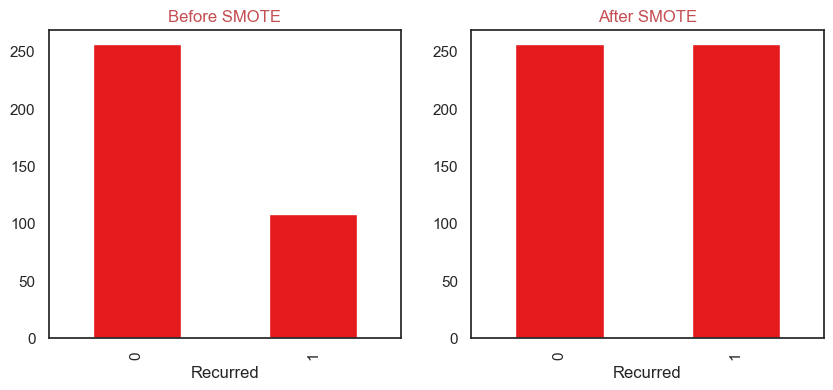

In [70]:
print(y.value_counts(),'\n', y_ov.value_counts())
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
y.value_counts().plot(kind='bar')
plt.title('Before SMOTE', color='r')
plt.subplot(1,2,2)
y_ov.value_counts().plot(kind='bar')
plt.title('After SMOTE',color='r')

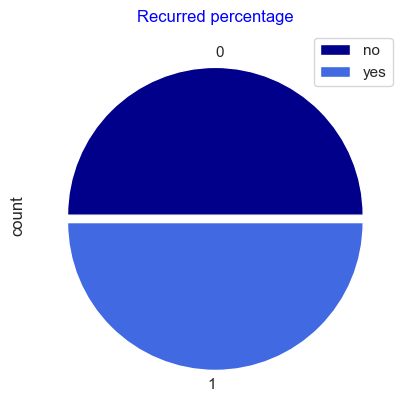

In [72]:
y_ov.value_counts().plot(kind='pie', explode=(0,0.05), colors=['darkblue','royalblue'])
plt.title('Recurred percentage', color ='blue')
plt.legend(['no','yes'])
plt.show()

## Train - Test splitting

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
xtrain_ov, xtest_ov, ytrain_ov, ytest_ov = train_test_split(x_ov,y_ov, test_size=0.2, random_state=142, stratify=y_ov)

## Feature Scaling

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain_ov = sc.fit_transform(xtrain_ov)
xtest_ov = sc.transform(xtest_ov)

In [76]:
pd.value_counts(ytest_ov)

Recurred
1    52
0    51
Name: count, dtype: int64

# Model Building

In [78]:
import xgboost as xgb

In [302]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

In [308]:
logreg = LogisticRegression()
Knn = KNeighborsClassifier()
svc = SVC()
DT = DecisionTreeClassifier()
RFC = RandomForestClassifier()
GB = GradientBoostingClassifier()
ADB = AdaBoostClassifier()
XGB = XGBClassifier()
NB = GaussianNB()

In [84]:
# models=[('Logistic Regression', lr),('KNeighborsClassifier', Knn),('SVC', svc),('Decision Tree', DT),
#         ('Random Forest', RFC),('Gradient Boosting', GB),('AdaBoost', 'ADB'),('XGBoost',xgb),('Naive Bayes', NB)] 

# 1. Logistic Regression

--------------------------------------------------
For test data
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       1.00      0.96      0.98        52

    accuracy                           0.98       103
   macro avg       0.98      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103

--------------------------------------------------
For train data
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       205
           1       0.98      0.98      0.98       204

    accuracy                           0.98       409
   macro avg       0.98      0.98      0.98       409
weighted avg       0.98      0.98      0.98       409

--------------------------------------------------


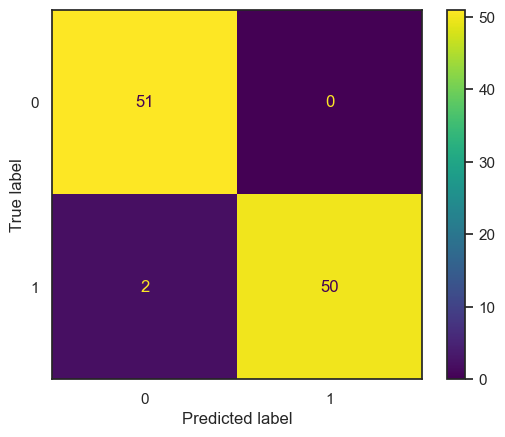

In [165]:
from sklearn.linear_model import LogisticRegression
## fitting
logreg = LogisticRegression()
logreg.fit(xtrain_ov, ytrain_ov)

## predicting
y_pred = logreg.predict(xtest_ov)
y_pred_train=logreg.predict(xtrain_ov)

## results
print('-'*50)
print('For test data')
print('-'*50)
print(classification_report(ytest_ov,y_pred))
print('-'*50)
print('For train data')
print('-'*50)
print(classification_report(ytrain_ov,y_pred_train))
print('-'*50)

cm = ConfusionMatrixDisplay.from_predictions(ytest_ov, y_pred)
print(cm)

In [164]:
## Accuracy, precision, recall

print("Accuracy score of LogisticRegression:", accuracy_score(ytest_ov, y_pred))
print("Precision score of LogisticRegression:", precision_score(ytest_ov, y_pred))
print("Recall score of LogisticRegression:", recall_score(ytest_ov, y_pred))


Accuracy score of LogisticRegression: 0.912621359223301
Precision score of LogisticRegression: 1.0
Recall score of LogisticRegression: 0.8269230769230769


## Evaluating : ROC Curve

In [173]:
## predict probabilities

y_pred_prob = logreg.predict_proba(xtest_ov)[:, 1]
fpr, tpr, _ = roc_curve(ytest_ov, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9981146304675717


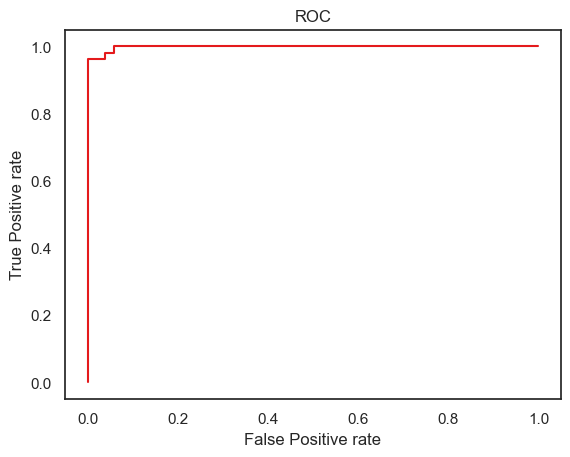

In [175]:
## Plotting the ROC curve

plt.plot(fpr, tpr)
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC")
plt.show()

# 2. KNN

--------------------------------------------------
For test data
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        51
           1       0.96      0.96      0.96        52

    accuracy                           0.96       103
   macro avg       0.96      0.96      0.96       103
weighted avg       0.96      0.96      0.96       103

--------------------------------------------------
For train data
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       205
           1       0.97      0.96      0.96       204

    accuracy                           0.96       409
   macro avg       0.96      0.96      0.96       409
weighted avg       0.96      0.96      0.96       409

--------------------------------------------------


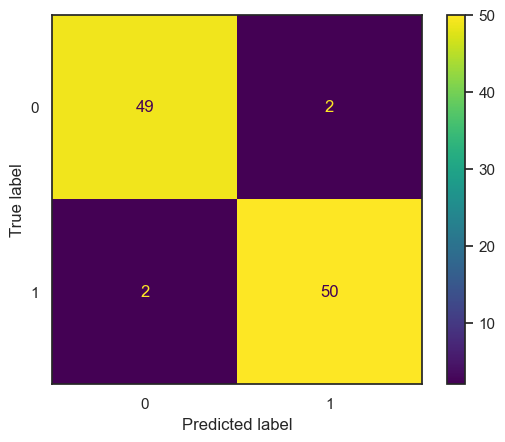

In [177]:

## fitting
knn = KNeighborsClassifier()
knn.fit(xtrain_ov, ytrain_ov)

## predicting
y_pred = knn.predict(xtest_ov)
y_pred_train=knn.predict(xtrain_ov)

## results
print('-'*50)
print('For test data')
print('-'*50)
print(classification_report(ytest_ov,y_pred))
print('-'*50)
print('For train data')
print('-'*50)
print(classification_report(ytrain_ov,y_pred_train))
print('-'*50)

cm = ConfusionMatrixDisplay.from_predictions(ytest_ov, y_pred)
print(cm)

In [178]:
## Accuracy, precision, recall

print("Accuracy score of KNN:", accuracy_score(ytest_ov, y_pred))
print("Precision score of KNN:", precision_score(ytest_ov, y_pred))
print("Recall score of KNN:", recall_score(ytest_ov, y_pred))

Accuracy score of KNN: 0.9611650485436893
Precision score of KNN: 0.9615384615384616
Recall score of KNN: 0.9615384615384616


## Evaluating : ROC Curve

In [179]:
## predict probabilities

y_pred_prob = knn.predict_proba(xtest_ov)[:, 1]
fpr, tpr, _ = roc_curve(ytest_ov, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9956636500754148


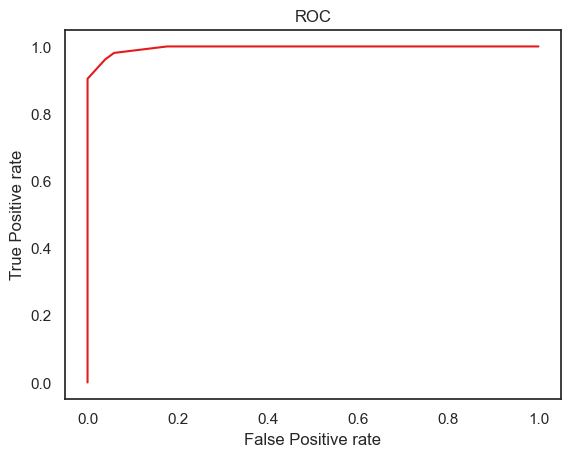

In [180]:
## Plotting the ROC curve

plt.plot(fpr, tpr)
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC")
plt.show()

### Finding optimal value of K

In [112]:
# error_rate = []

# # Will take some time
# for i in range(1,41):    
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(xtrain_ov,ytrain_ov)
#     pred_i = knn.predict(xtest_ov)
#     error_rate.append(np.mean(pred_i != ytest_ov))
    
# print(error_rate) 

In [111]:
# plt.figure(figsize=(10,5))
# plt.plot(range(1,41),error_rate,color='blue', linestyle='dashed', marker='o',
#          markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')

# 3. SVM

--------------------------------------------------
For test data
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       1.00      0.96      0.98        52

    accuracy                           0.98       103
   macro avg       0.98      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103

--------------------------------------------------
For train data
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       205
           1       1.00      0.99      0.99       204

    accuracy                           0.99       409
   macro avg       0.99      0.99      0.99       409
weighted avg       0.99      0.99      0.99       409

--------------------------------------------------


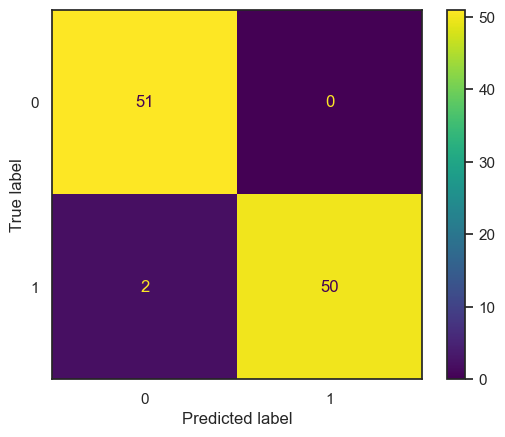

In [123]:
svc = SVC()
svc.fit(xtrain_ov, ytrain_ov)

## predicting
y_pred = svc.predict(xtest_ov)
y_pred_train=svc.predict(xtrain_ov)

## results
print('-'*50)
print('For test data')
print('-'*50)
print(classification_report(ytest_ov,y_pred))
print('-'*50)
print('For train data')
print('-'*50)
print(classification_report(ytrain_ov,y_pred_train))
print('-'*50)

cm = ConfusionMatrixDisplay.from_predictions(ytest_ov, y_pred)
print(cm)

In [181]:
## Accuracy, precision, recall

print("Accuracy score of SVM:", accuracy_score(ytest_ov, y_pred))
print("Precision score of SVM:", precision_score(ytest_ov, y_pred))
print("Recall score of SVM:", recall_score(ytest_ov, y_pred))

Accuracy score of SVM: 0.9611650485436893
Precision score of SVM: 0.9615384615384616
Recall score of SVM: 0.9615384615384616


## Evaluating : ROC Curve

In [190]:
## predict probabilities

# y_pred_prob = svc.predict_proba(xtest_ov)[:, 1]
# fpr, tpr, _ = roc_curve(ytest_ov, y_pred_prob, pos_label=1)
# roc_auc = auc(fpr, tpr)
# print(roc_auc)

In [189]:
## Plotting the ROC curve

# plt.plot(fpr, tpr)
# plt.xlabel("False Positive rate")
# plt.ylabel("True Positive rate")
# plt.title("ROC")
# plt.show()

# 4. Decision Tree

--------------------------------------------------
For test data
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       1.00      0.96      0.98        52

    accuracy                           0.98       103
   macro avg       0.98      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103

--------------------------------------------------
For train data
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00       204

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409

--------------------------------------------------


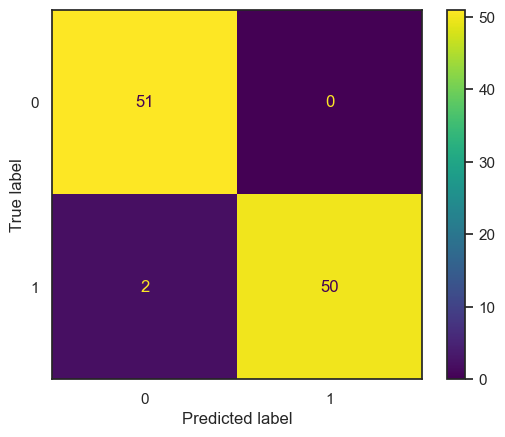

In [127]:
DT = DecisionTreeClassifier()
DT.fit(xtrain_ov, ytrain_ov)

## predicting
y_pred = DT.predict(xtest_ov)
y_pred_train=DT.predict(xtrain_ov)

## results
print('-'*50)
print('For test data')
print('-'*50)
print(classification_report(ytest_ov,y_pred))
print('-'*50)
print('For train data')
print('-'*50)
print(classification_report(ytrain_ov,y_pred_train))
print('-'*50)

cm = ConfusionMatrixDisplay.from_predictions(ytest_ov, y_pred)
print(cm)

In [128]:
## Accuracy, precision, recall

print("Accuracy score of Decision Tree:", accuracy_score(ytest_ov, y_pred))
print("Precision score of Decision Tree:", precision_score(ytest_ov, y_pred))
print("Recall score of Decision Tree:", recall_score(ytest_ov, y_pred))

Accuracy score of Decision Tree: 0.9805825242718447
Precision score of Decision Tree: 1.0
Recall score of Decision Tree: 0.9615384615384616


## Evaluationg : ROC Curve

In [191]:
## predict probabilities

y_pred_prob = DT.predict_proba(xtest_ov)[:, 1]
fpr, tpr, _ = roc_curve(ytest_ov, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9711538461538461


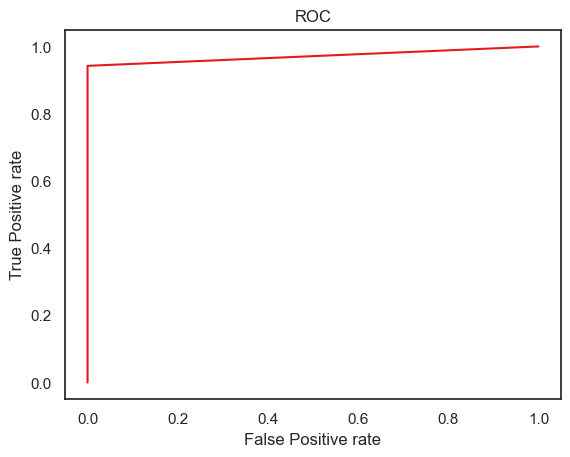

In [192]:
## Plotting the ROC curve

plt.plot(fpr, tpr)
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC")
plt.show()

# 5. Random Forest

--------------------------------------------------
For test data
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       1.00      0.96      0.98        52

    accuracy                           0.98       103
   macro avg       0.98      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103

--------------------------------------------------
For train data
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00       204

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409

--------------------------------------------------


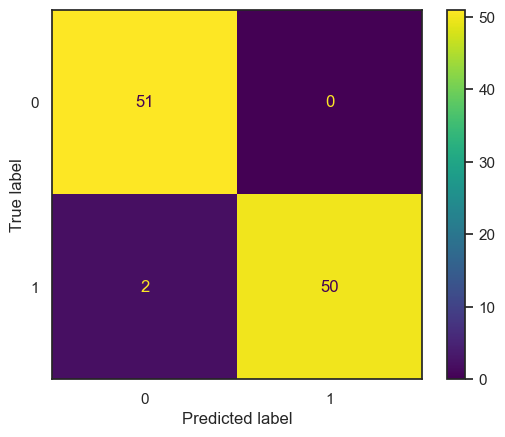

In [129]:
RFC = RandomForestClassifier()
RFC.fit(xtrain_ov, ytrain_ov)

# predicting
y_pred = RFC.predict(xtest_ov)
y_pred_train=RFC.predict(xtrain_ov)

# results
print('-'*50)
print('For test data')
print('-'*50)
print(classification_report(ytest_ov,y_pred))
print('-'*50)
print('For train data')
print('-'*50)
print(classification_report(ytrain_ov,y_pred_train))
print('-'*50)

cm = ConfusionMatrixDisplay.from_predictions(ytest_ov, y_pred)
print(cm)

In [130]:
## Accuracy, precision, recall

print("Accuracy score of Random Forest:", accuracy_score(ytest_ov, y_pred))
print("Precision score of Random Forest:", precision_score(ytest_ov, y_pred))
print("Recall score of Random Forest:", recall_score(ytest_ov, y_pred))

Accuracy score of Random Forest: 0.9805825242718447
Precision score of Random Forest: 1.0
Recall score of Random Forest: 0.9615384615384616


## Evaluating : ROC Curve

In [194]:
## predict probabilities

y_pred_prob = RFC.predict_proba(xtest_ov)[:, 1]
fpr, tpr, _ = roc_curve(ytest_ov, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
print(roc_auc)

1.0


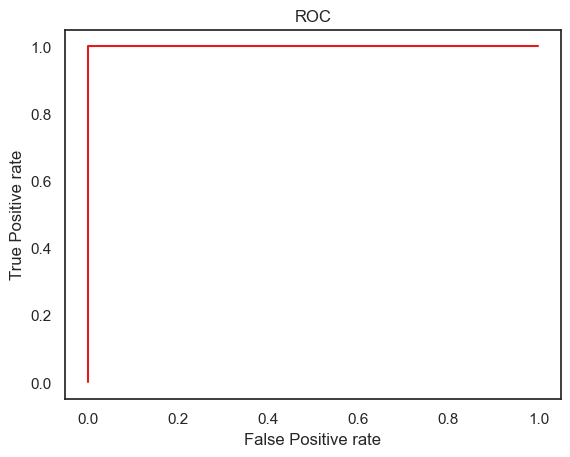

In [195]:
## Plotting the ROC curve

plt.plot(fpr, tpr)
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC")
plt.show()

In [254]:
# feature_scores = pd.Series(RFC.feature_importances_, index=xtrain_ov.columns).sort_values(ascending=False)

# feature_scores

# 6. Gradient Boosting

--------------------------------------------------
For test data
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       1.00      0.96      0.98        52

    accuracy                           0.98       103
   macro avg       0.98      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103

--------------------------------------------------
For train data
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00       204

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409

--------------------------------------------------


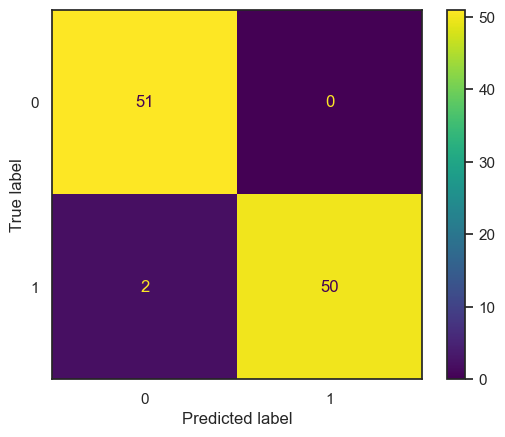

In [132]:
GB = GradientBoostingClassifier()
GB.fit(xtrain_ov, ytrain_ov)

# predicting
y_pred = GB.predict(xtest_ov)
y_pred_train=GB.predict(xtrain_ov)

# results
print('-'*50)
print('For test data')
print('-'*50)
print(classification_report(ytest_ov,y_pred))
print('-'*50)
print('For train data')
print('-'*50)
print(classification_report(ytrain_ov,y_pred_train))
print('-'*50)

cm = ConfusionMatrixDisplay.from_predictions(ytest_ov, y_pred)
print(cm)

In [197]:
## Accuracy, precision, recall

print("Accuracy score of Gradient Boosting:", accuracy_score(ytest_ov, y_pred))
print("Precision score of Gradient Boosting:", precision_score(ytest_ov, y_pred))
print("Recall score of Gradient Boosting:", recall_score(ytest_ov, y_pred))

Accuracy score of Gradient Boosting: 0.9611650485436893
Precision score of Gradient Boosting: 0.9615384615384616
Recall score of Gradient Boosting: 0.9615384615384616


## Evaluating : ROC Curve

In [198]:
## predict probabilities

y_pred_prob = GB.predict_proba(xtest_ov)[:, 1]
fpr, tpr, _ = roc_curve(ytest_ov, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
print(roc_auc)

1.0


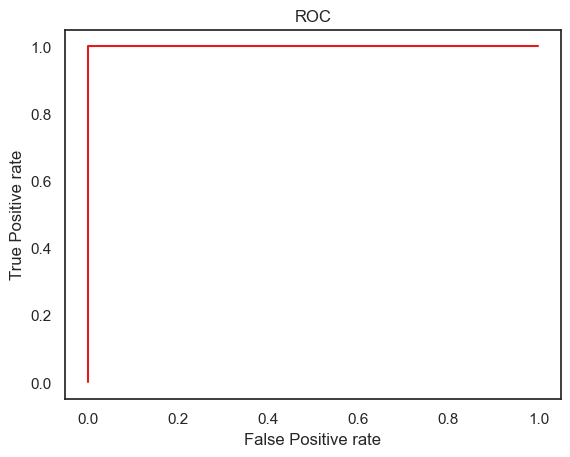

In [199]:
## Plotting the ROC curve

plt.plot(fpr, tpr)
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC")
plt.show()

# 7. AdaBoost

--------------------------------------------------
For test data
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       1.00      0.96      0.98        52

    accuracy                           0.98       103
   macro avg       0.98      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103

--------------------------------------------------
For train data
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       205
           1       0.97      0.98      0.98       204

    accuracy                           0.98       409
   macro avg       0.98      0.98      0.98       409
weighted avg       0.98      0.98      0.98       409

--------------------------------------------------


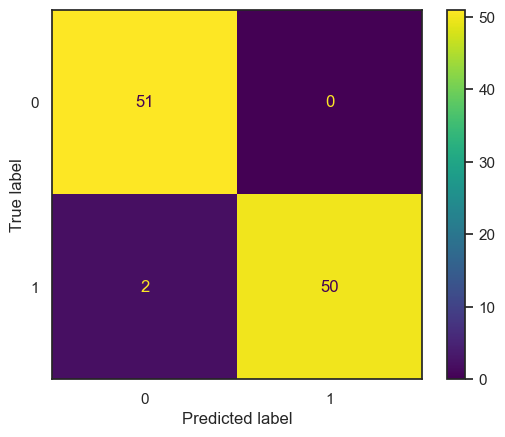

In [117]:
ADB = AdaBoostClassifier()
ADB.fit(xtrain_ov, ytrain_ov)

# predicting
y_pred = ADB.predict(xtest_ov)
y_pred_train=ADB.predict(xtrain_ov)

# results
print('-'*50)
print('For test data')
print('-'*50)
print(classification_report(ytest_ov,y_pred))
print('-'*50)
print('For train data')
print('-'*50)
print(classification_report(ytrain_ov,y_pred_train))
print('-'*50)

cm = ConfusionMatrixDisplay.from_predictions(ytest_ov, y_pred)
print(cm)

In [134]:
## Accuracy, precision, recall

print("Accuracy score of AdaBoost:", accuracy_score(ytest_ov, y_pred))
print("Precision score of AdaBoost:", precision_score(ytest_ov, y_pred))
print("Recall score of AdaBoost:", recall_score(ytest_ov, y_pred))

Accuracy score of AdaBoost: 0.9805825242718447
Precision score of AdaBoost: 1.0
Recall score of AdaBoost: 0.9615384615384616


## Evaluating : ROC Curve

In [200]:
## predict probabilities

y_pred_prob = ADB.predict_proba(xtest_ov)[:, 1]
fpr, tpr, _ = roc_curve(ytest_ov, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9981146304675717


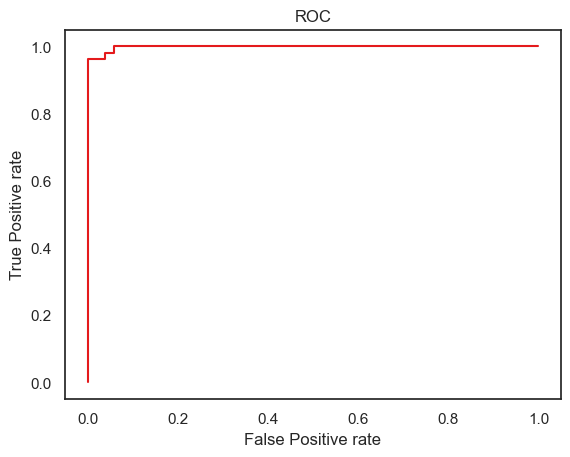

In [201]:
## Plotting the ROC curve

plt.plot(fpr, tpr)
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC")
plt.show()

# 8. XGBoost

--------------------------------------------------
For test data
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       1.00      0.96      0.98        52

    accuracy                           0.98       103
   macro avg       0.98      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103

--------------------------------------------------
For train data
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       205
           1       1.00      0.99      1.00       204

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409

--------------------------------------------------


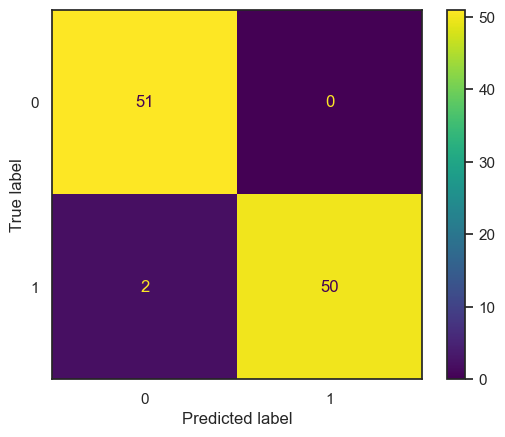

In [118]:
XGB = XGBClassifier()
XGB.fit(xtrain_ov, ytrain_ov)

# predicting
y_pred = XGB.predict(xtest_ov)
y_pred_train=XGB.predict(xtrain_ov)

# results
print('-'*50)
print('For test data')
print('-'*50)
print(classification_report(ytest_ov,y_pred))
print('-'*50)
print('For train data')
print('-'*50)
print(classification_report(ytrain_ov,y_pred_train))
print('-'*50)

cm = ConfusionMatrixDisplay.from_predictions(ytest_ov, y_pred)
print(cm)

In [135]:
## Accuracy, precision, recall

print("Accuracy score of XGBoost:", accuracy_score(ytest_ov, y_pred))
print("Precision score of XGBoost:", precision_score(ytest_ov, y_pred))
print("Recall score of XGBoost:", recall_score(ytest_ov, y_pred))

Accuracy score of XGBoost: 0.9805825242718447
Precision score of XGBoost: 1.0
Recall score of XGBoost: 0.9615384615384616


## Evaluating : ROC Curve

In [203]:
## predict probabilities

y_pred_prob = XGB.predict_proba(xtest_ov)[:, 1]
fpr, tpr, _ = roc_curve(ytest_ov, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9981146304675717


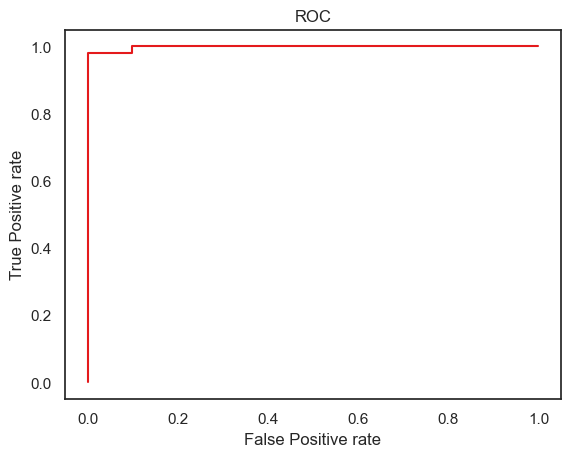

In [204]:
## Plotting the ROC curve

plt.plot(fpr, tpr)
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC")
plt.show()

# 9. Naive Bayes

--------------------------------------------------
For test data
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        51
           1       1.00      0.83      0.91        52

    accuracy                           0.91       103
   macro avg       0.93      0.91      0.91       103
weighted avg       0.93      0.91      0.91       103

--------------------------------------------------
For train data
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       205
           1       0.99      0.71      0.83       204

    accuracy                           0.85       409
   macro avg       0.88      0.85      0.85       409
weighted avg       0.88      0.85      0.85       409

--------------------------------------------------


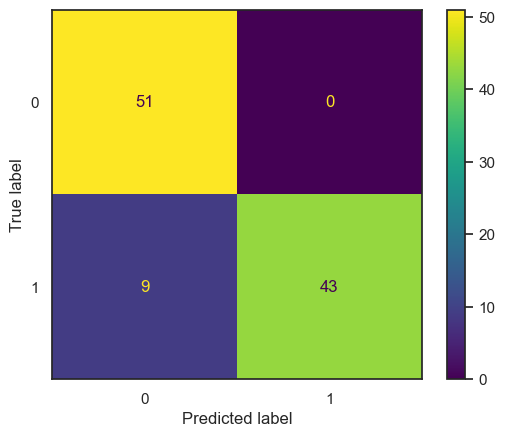

In [137]:
NB = GaussianNB()
NB.fit(xtrain_ov, ytrain_ov)

# predicting
y_pred = NB.predict(xtest_ov)
y_pred_train=NB.predict(xtrain_ov)

# results
print('-'*50)
print('For test data')
print('-'*50)
print(classification_report(ytest_ov,y_pred))
print('-'*50)
print('For train data')
print('-'*50)
print(classification_report(ytrain_ov,y_pred_train))
print('-'*50)

cm = ConfusionMatrixDisplay.from_predictions(ytest_ov, y_pred)
print(cm)


In [138]:
## Accuracy, precision, recall

print("Accuracy score of Naive Bayes:", accuracy_score(ytest_ov, y_pred))
print("Precision score of Naive Bayes:", precision_score(ytest_ov, y_pred))
print("Recall score of Naive Bayes:", recall_score(ytest_ov, y_pred))

Accuracy score of Naive Bayes: 0.912621359223301
Precision score of Naive Bayes: 1.0
Recall score of Naive Bayes: 0.8269230769230769


## Evaluating : ROC Curve

In [205]:
## predict probabilities

y_pred_prob = NB.predict_proba(xtest_ov)[:, 1]
fpr, tpr, _ = roc_curve(ytest_ov, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9996229260935143


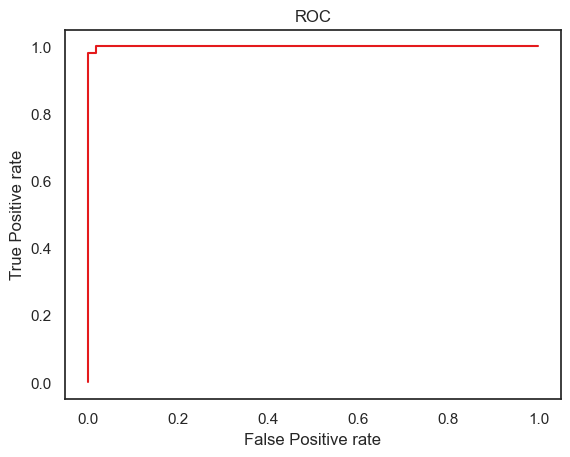

In [206]:
## Plotting the ROC curve

plt.plot(fpr, tpr)
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC")
plt.show()

## Cross Validation

In [139]:
def cv(model):
    acc_scores = cross_val_score(model, xtrain_ov, ytrain_ov, cv=10)
    Mean_accuracy_score = acc_scores.mean()

    prec_scores = cross_val_score(model, xtrain_ov, ytrain_ov, cv=10, scoring = 'precision')
    Mean_precision_score = prec_scores.mean()

    rec_scores = cross_val_score(model, xtrain_ov, ytrain_ov, cv=10, scoring = 'recall')
    Mean_recall_score = rec_scores.mean()

    f1_scores = cross_val_score(model, xtrain_ov, ytrain_ov, cv=10, scoring = 'f1')
    Mean_f1_score = f1_scores.mean()

    return(round(Mean_accuracy_score,3)),(round(Mean_precision_score,3)),(round(Mean_recall_score,3)),(round(Mean_f1_score,3)) 
                                



### *1. Logistic Regression*

In [141]:
logreg = LogisticRegression(random_state=11).fit(xtrain_ov, ytrain_ov)
lr_accuracy, lr_precision, lr_recall, lr_f1 = cv(logreg)
lr_results = {"Accuracy Score": lr_accuracy, "Precision Score":lr_precision,
              "Recall Score": lr_recall, "f1 Score": lr_f1}
print(lr_results)

{'Accuracy Score': 0.951, 'Precision Score': 0.955, 'Recall Score': 0.945, 'f1 Score': 0.949}


### *2. KNN*

In [143]:
knn = KNeighborsClassifier().fit(xtrain_ov, ytrain_ov)
knn_accuracy, knn_precision, knn_recall, knn_f1 = cv(knn)
knn_results = {"Accuracy Score": knn_accuracy, "Precision Score":knn_precision,
              "Recall Score": knn_recall, "f1 Score": knn_f1}
print(knn_results)

{'Accuracy Score': 0.941, 'Precision Score': 0.946, 'Recall Score': 0.941, 'f1 Score': 0.941}


### *3. SVC*

In [145]:
svc = SVC().fit(xtrain_ov, ytrain_ov)
svc_accuracy, svc_precision, svc_recall, svc_f1 = cv(svc)
svc_results = {"Accuracy Score": svc_accuracy, "Precision Score":svc_precision,
              "Recall Score": svc_recall, "f1 Score": svc_f1}
print(svc_results)


{'Accuracy Score': 0.949, 'Precision Score': 0.937, 'Recall Score': 0.965, 'f1 Score': 0.95}


### *4. Decision Tree*

In [146]:
DT = DecisionTreeClassifier().fit(xtrain_ov, ytrain_ov)
DT_accuracy, DT_precision, DT_recall, DT_f1 = cv(DT)
DT_results = {"Accuracy Score": DT_accuracy, "Precision Score":DT_precision,
              "Recall Score": DT_recall, "f1 Score": DT_f1}
print(DT_results)

{'Accuracy Score': 0.949, 'Precision Score': 0.953, 'Recall Score': 0.941, 'f1 Score': 0.946}


### *5. Random Forest*

In [147]:
RFC = RandomForestClassifier().fit(xtrain_ov, ytrain_ov)
RFC_accuracy, RFC_precision, RFC_recall, RFC_f1 = cv(RFC)
RFC_results = {"Accuracy Score": RFC_accuracy, "Precision Score":RFC_precision,
              "Recall Score": RFC_recall, "f1 Score": RFC_f1}
print(RFC_results)

{'Accuracy Score': 0.971, 'Precision Score': 0.984, 'Recall Score': 0.966, 'f1 Score': 0.97}


### *6.Gradient Boost*

In [151]:
GB = GradientBoostingClassifier().fit(xtrain_ov, ytrain_ov)
GB_accuracy, GB_precision, GB_recall, GB_f1 = cv(GB)
GB_results = {"Accuracy Score": GB_accuracy, "Precision Score":GB_precision,
              "Recall Score": GB_recall, "f1 Score": GB_f1}
print(GB_results)

{'Accuracy Score': 0.968, 'Precision Score': 0.972, 'Recall Score': 0.966, 'f1 Score': 0.966}


### *7. AdaBoost*

In [152]:
ADB = AdaBoostClassifier().fit(xtrain_ov, ytrain_ov)
ADB_accuracy, ADB_precision, ADB_recall, ADB_f1 = cv(ADB)
ADB_results = {"Accuracy Score": ADB_accuracy, "Precision Score":ADB_precision,
              "Recall Score": ADB_recall, "f1 Score": ADB_f1}
print(ADB_results)

{'Accuracy Score': 0.941, 'Precision Score': 0.952, 'Recall Score': 0.931, 'f1 Score': 0.94}


### *8. XGBoost*

In [153]:
XGB = XGBClassifier().fit(xtrain_ov, ytrain_ov)
XGB_accuracy, XGB_precision, XGB_recall, XGB_f1 = cv(XGB)
XGB_results = {"Accuracy Score": XGB_accuracy, "Precision Score":XGB_precision,
              "Recall Score": XGB_recall, "f1 Score": XGB_f1}
print(XGB_results)

{'Accuracy Score': 0.966, 'Precision Score': 0.962, 'Recall Score': 0.971, 'f1 Score': 0.966}


### *9. Naive Bayes*

In [154]:
NB = GaussianNB().fit(xtrain_ov, ytrain_ov)
NB_accuracy, NB_precision, NB_recall, NB_f1 = cv(NB)
NB_results = {"Accuracy Score": NB_accuracy, "Precision Score":NB_precision,
              "Recall Score": NB_recall, "f1 Score": NB_f1}
print(NB_results)

{'Accuracy Score': 0.826, 'Precision Score': 0.967, 'Recall Score': 0.676, 'f1 Score': 0.792}


### Performance Evaluation

In [235]:
data = [
    ['Logistic Regression', lr_accuracy, lr_precision, lr_recall, lr_f1],
    ['KNN', knn_accuracy, knn_precision, knn_recall, knn_f1],
    ['SVC', svc_accuracy, svc_precision, svc_recall, svc_f1],
    ['Decision Tree', DT_accuracy, DT_precision, DT_recall, DT_f1],
    ['Random Forest', RFC_accuracy, RFC_precision, RFC_recall, RFC_f1],
    ['Gradient Boost', GB_accuracy, GB_precision, GB_recall, GB_f1],
    ['AdaBoost', ADB_accuracy, ADB_precision, ADB_recall, ADB_f1],
    ['XGBoost', XGB_accuracy, XGB_precision, XGB_recall, XGB_f1],
    ['Naive Bayes', NB_accuracy, NB_precision, NB_recall, NB_f1]]

Model_Performance = pd.DataFrame(data, columns = ['Models', 'Accuracy', 'Precision', 'Recall', 'F1'])
Model_Performance.style.background_gradient(cmap= 'Reds')

,Models,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.951000,0.955000,0.945000,0.949000
1,KNN,0.941000,0.946000,0.941000,0.941000
2,SVC,0.949000,0.937000,0.965000,0.950000
3,Decision Tree,0.949000,0.953000,0.941000,0.946000
4,Random Forest,0.971000,0.984000,0.966000,0.970000
5,Gradient Boost,0.968000,0.972000,0.966000,0.966000
6,AdaBoost,0.941000,0.952000,0.931000,0.940000
7,XGBoost,0.966000,0.962000,0.971000,0.966000
8,Naive Bayes,0.826000,0.967000,0.676000,0.792000


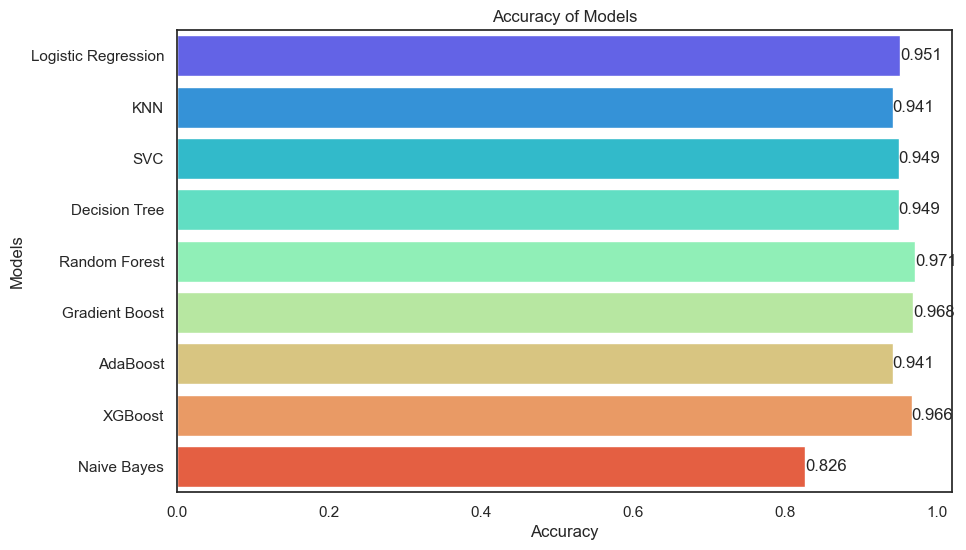

In [239]:
Model_Accuracy = [
    ['Logistic Regression', lr_accuracy],
    ['KNN', knn_accuracy],
    ['SVC', svc_accuracy],
    ['Decision Tree', DT_accuracy],
    ['Random Forest', RFC_accuracy],
    ['Gradient Boost', GB_accuracy],
    ['AdaBoost', ADB_accuracy],
    ['XGBoost', XGB_accuracy],
    ['Naive Bayes', NB_accuracy]]



Accuracy = pd.DataFrame(Model_Accuracy, columns = ['Models', 'Accuracy'])

plt.figure(figsize =(10,6))
ax=sns.barplot(data = Accuracy, x = 'Accuracy', y = 'Models', palette ='rainbow' )
plt.title('Accuracy of Models')

for i in ax.containers:
    ax.bar_label(i)

plt.show()


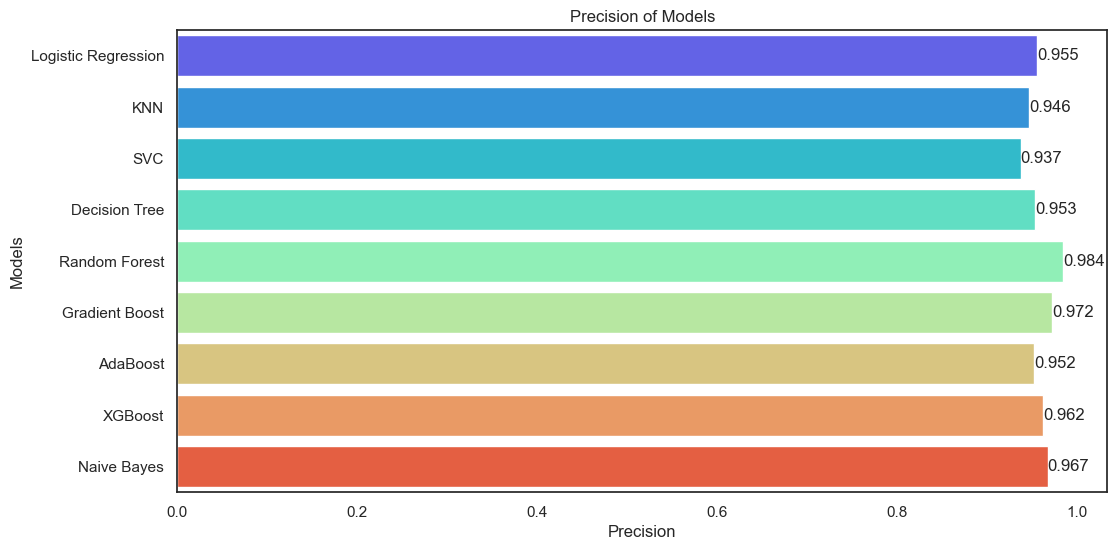

In [246]:
Model_Precision = [
    ['Logistic Regression', lr_precision],
    ['KNN', knn_precision],
    ['SVC', svc_precision],
    ['Decision Tree', DT_precision],
    ['Random Forest', RFC_precision],
    ['Gradient Boost', GB_precision],
    ['AdaBoost', ADB_precision],
    ['XGBoost', XGB_precision],
    ['Naive Bayes', NB_precision]]



Precision = pd.DataFrame(Model_Precision, columns = ['Models', 'Precision'])

plt.figure(figsize =(12,6))
ax=sns.barplot(data = Precision, x = 'Precision', y = 'Models', palette ='rainbow' )
plt.title('Precision of Models')

for i in ax.containers:
    ax.bar_label(i)

plt.show()

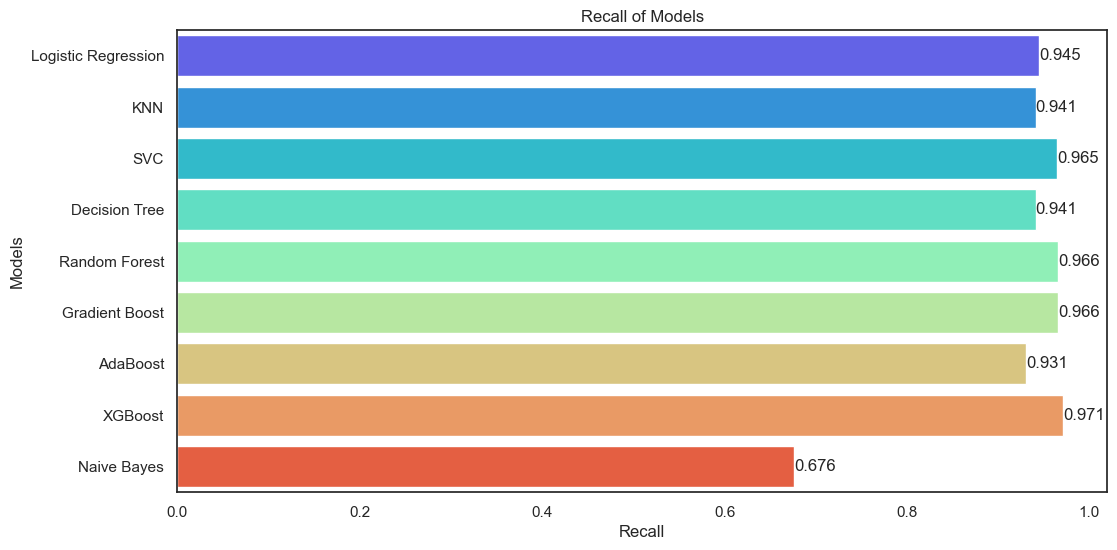

In [245]:
Model_Recall = [
    ['Logistic Regression', lr_recall],
    ['KNN', knn_recall],
    ['SVC', svc_recall],
    ['Decision Tree', DT_recall],
    ['Random Forest', RFC_recall],
    ['Gradient Boost', GB_recall],
    ['AdaBoost', ADB_recall],
    ['XGBoost', XGB_recall],
    ['Naive Bayes', NB_recall]]



Recall = pd.DataFrame(Model_Recall, columns = ['Models', 'Recall'])

plt.figure(figsize =(12,6))
ax=sns.barplot(data = Recall, x = 'Recall', y = 'Models', palette ='rainbow' )
plt.title('Recall of Models')

for i in ax.containers:
    ax.bar_label(i)

plt.show()

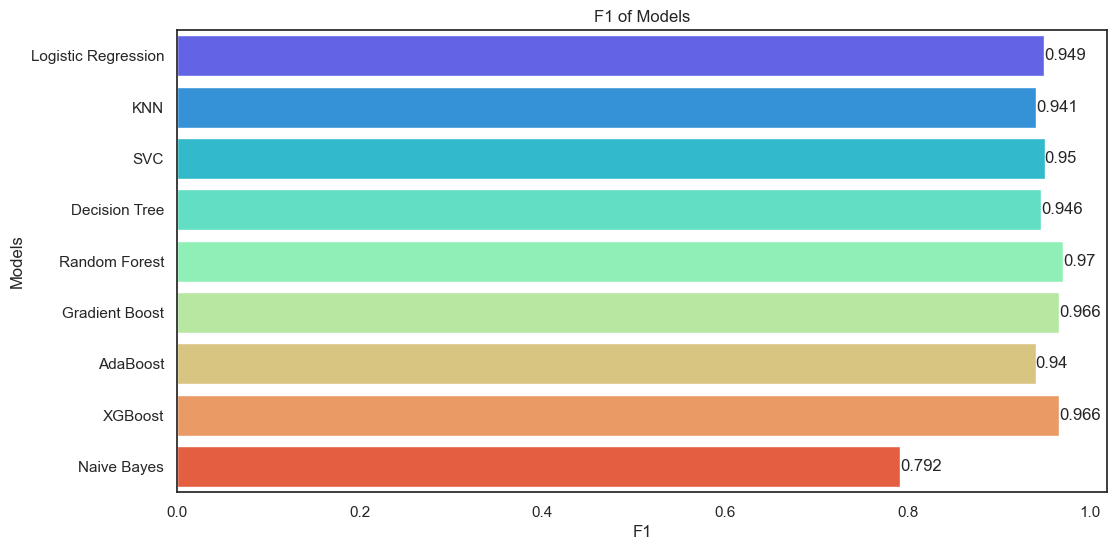

In [247]:
Model_f1 = [
    ['Logistic Regression', lr_f1],
    ['KNN', knn_f1],
    ['SVC', svc_f1],
    ['Decision Tree', DT_f1],
    ['Random Forest', RFC_f1],
    ['Gradient Boost', GB_f1],
    ['AdaBoost', ADB_f1],
    ['XGBoost', XGB_f1],
    ['Naive Bayes', NB_f1]]



F1 = pd.DataFrame(Model_f1, columns = ['Models', 'F1'])

plt.figure(figsize =(12,6))
ax=sns.barplot(data = F1, x = 'F1', y = 'Models', palette ='rainbow' )
plt.title('F1 of Models')

for i in ax.containers:
    ax.bar_label(i)

plt.show()

#### *Best performing models : Random Forest & Gradient Boosting*

## Hyper Parameter tuning on best performing models

In [257]:
## Function to find out best parameters using Grid Search CV

def classifier(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring = "accuracy")
    grid_search.fit(xtrain_ov, ytrain_ov)
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

### 1. Random Forest

In [258]:
## Testing hyper parameters

param_grid = {'max_depth':[30, 50, 80], 'criterion':['entropy', 'gini'],
             'max_leaf_nodes':[500, 1000, 1200],'min_samples_split':[8,10,12,14,16]}
rf = RandomForestClassifier()
classifier(rf, param_grid)

Best parameters: {'criterion': 'entropy', 'max_depth': 80, 'max_leaf_nodes': 500, 'min_samples_split': 8}
Best score: 0.9731707317073172


In [266]:
rfc = RandomForestClassifier(criterion = 'entropy', max_depth= 80, max_leaf_nodes= 500, min_samples_split= 8)

## fitting
rfc.fit(xtrain_ov, ytrain_ov)

##predicting

y_pred = rfc.predict(xtest_ov)
y_pred_train = rfc.predict(xtrain_ov)

# results
print('-'*50)
print('For test data')
print('-'*50)
print(classification_report(ytest_ov,y_pred))
print('-'*50)
print('For train data')
print('-'*50)
print(classification_report(ytrain_ov,y_pred_train))

# Training accuracy
print(f'Training accuracy = {accuracy_score(ytrain_ov, y_pred_train)}')
# Testing accuracy
print(f'Testing accuracy = {accuracy_score(ytest_ov, y_pred)}')
# Testing precision
print(f'Testing precision = {precision_score(ytest_ov, y_pred)}')
# Testing recall
print(f'Testing recall = {recall_score(ytest_ov, y_pred)}')


--------------------------------------------------
For test data
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       1.00      0.96      0.98        52

    accuracy                           0.98       103
   macro avg       0.98      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103

--------------------------------------------------
For train data
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       205
           1       0.99      0.97      0.98       204

    accuracy                           0.98       409
   macro avg       0.98      0.98      0.98       409
weighted avg       0.98      0.98      0.98       409

Training accuracy = 0.980440097799511
Testing accuracy = 0.9805825242718447
Testing precision = 1.0
Testing recal

### 2. Gradient Boosting

In [298]:
param_grid = {'n_estimators' : range(140,151,10), 'max_depth':[9,11,14], 'min_samples_split' : [80,100,120,140]}

gdb = GradientBoostingClassifier()
classifier(gdb, param_grid)

Best parameters: {'max_depth': 9, 'min_samples_split': 140, 'n_estimators': 140}
Best score: 0.9609756097560975


In [278]:
param_grid = {'n_estimators' : [150],'max_depth':range(9,10,1)}

gdb = GradientBoostingClassifier()
classifier(gdb, param_grid)

Best parameters: {'max_depth': 9, 'n_estimators': 150}
Best score: 0.9487195121951219


In [279]:
param_grid = {'n_estimators' : [150],'max_depth':[9], 'min_samples_split' : [80,100,120,140]}

gdb = GradientBoostingClassifier()
classifier(gdb, param_grid)

Best parameters: {'max_depth': 9, 'min_samples_split': 80, 'n_estimators': 150}
Best score: 0.9609146341463415


In [297]:
param_grid = {'n_estimators' : [200],'max_depth':[9], 'min_samples_split' : [80]}

gdb = GradientBoostingClassifier()
classifier(gdb, param_grid)

Best parameters: {'max_depth': 9, 'min_samples_split': 80, 'n_estimators': 200}
Best score: 0.9633536585365853


In [299]:
from sklearn.ensemble import GradientBoostingClassifier

gdb = GradientBoostingClassifier(max_depth= 9, min_samples_split= 80, n_estimators= 200)
gdb.fit(xtrain_ov,ytrain_ov)

y_pred = gdb.predict(xtest_ov)
y_pred_train = gdb.predict(xtrain_ov)


# results
print('-'*50)
print('For test data')
print('-'*50)
print(classification_report(ytest_ov,y_pred))
print('-'*50)
print('For train data')
print('-'*50)
print(classification_report(ytrain_ov,y_pred_train))

# Training accuracy
print(f'Training accuracy = {accuracy_score(ytrain_ov, y_pred_train)}')
# Testing accuracy
print(f'Testing accuracy = {accuracy_score(ytest_ov, y_pred)}')
# Testing precision
print(f'Testing precision = {precision_score(ytest_ov, y_pred)}')
# Testing recall
print(f'Testing recall = {recall_score(ytest_ov, y_pred)}')

--------------------------------------------------
For test data
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       1.00      0.96      0.98        52

    accuracy                           0.98       103
   macro avg       0.98      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103

--------------------------------------------------
For train data
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00       204

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409

Training accuracy = 0.9975550122249389
Testing accuracy = 0.9805825242718447
Testing precision = 1.0
Testing reca

## Performance Comparision

In [300]:
from tabulate import tabulate

In [301]:
table = [['Model_Name', 'Training_accuracy', 'Testing_accuracy', 'Testing_Precision', 'Testing_Recall'], 
         ['Random Forest', 0.980, 0.9805, 1.0, 0.961],  
         ['Gradient Boosting', 0.997, 0.980, 1.0, 0.961]]

print(tabulate(table, headers = 'firstrow', tablefmt = "fancy_grid"))

╒═══════════════════╤═════════════════════╤════════════════════╤═════════════════════╤══════════════════╕
│ Model_Name        │   Training_accuracy │   Testing_accuracy │   Testing_Precision │   Testing_Recall │
╞═══════════════════╪═════════════════════╪════════════════════╪═════════════════════╪══════════════════╡
│ Random Forest     │               0.98  │             0.9805 │                   1 │            0.961 │
├───────────────────┼─────────────────────┼────────────────────┼─────────────────────┼──────────────────┤
│ Gradient Boosting │               0.997 │             0.98   │                   1 │            0.961 │
╘═══════════════════╧═════════════════════╧════════════════════╧═════════════════════╧══════════════════╛


## With 98% accuracy, algorithms are able to classify the data points correctly